# IMPORTS

In [1]:
import sys
sys.path.append('../src/')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.metrics import pairwise_distances
from PIL import Image
from sklearn.metrics import pairwise_distances
from sklearn.cluster import Birch
from sklearn.decomposition import PCA

from DataSetFactory import DataSetFactory
from ClusterPlot import ClusterPlot

In [2]:
RANDOM_STATE = 42
SAMPLE_SIZE=0.5

# LOAD DATA

In [3]:
ds_32 = DataSetFactory.get_dataset('FASHION_MNIST_AE32', RANDOM_STATE, sample=SAMPLE_SIZE)
ds_128 = DataSetFactory.get_dataset('FASHION_MNIST_AE128', RANDOM_STATE, sample=SAMPLE_SIZE)
ds_512 = DataSetFactory.get_dataset('FASHION_MNIST_AE512', RANDOM_STATE, sample=SAMPLE_SIZE)
ds_orig = DataSetFactory.get_dataset('FASHION_MNIST_AE_ORIG', RANDOM_STATE, sample=SAMPLE_SIZE)

In [4]:
X_32 = ds_32.df[ds_32.feature_cols].values
y_32 = ds_32.df[ds_32.label_col].values
X_128 = ds_128.df[ds_128.feature_cols].values
y_128 = ds_128.df[ds_128.label_col].values
X_512 = ds_512.df[ds_512.feature_cols].values
y_512 = ds_512.df[ds_512.label_col].values
X_orig = ds_orig.df[ds_orig.feature_cols].values
y_orig = ds_orig.df[ds_orig.label_col].values

In [6]:
X_32.shape, X_128.shape, X_512.shape , X_orig.shape

((5000, 32), (5000, 128), (5000, 512), (5000, 784))

# BIRCH THRESHOLDS

In [8]:
def get_num_clusters_birch(ds, threshold):
    num_clusters = 0
    for label in ds.df[ds.label_col].unique():
        label_data = ds.df[ds.df[ds.label_col]==label][ds.feature_cols].values
        birch = Birch(threshold=threshold, branching_factor=2, n_clusters=None)
        birch.fit(label_data)
        num_clusters += birch.subcluster_centers_.shape[0]
    return num_clusters

def birch_threshold_plot(X, ds):
    dist_mat = pairwise_distances(X)
    print(dist_mat.shape)
    threshold_candidates = np.unique(dist_mat)
    print(threshold_candidates.shape)
    # for the sake of the experiment let's evaluate all of them
    thresholds_df = pd.DataFrame(threshold_candidates, columns=['threshold'])
    thresholds_df['num_clusters'] = np.nan
    thresholds_df['num_points'] = ds.df.shape[0]
    thresholds_df.hist(['threshold'])
    plt.show()
    # Filter only thresholds smaller than 1.5
    # thresholds_df_sample = thresholds_df[thresholds_df['threshold']<=70]
    # thresholds_df_sample = thresholds_df_sample.sample(n=200, random_state=RANDOM_STATE)
    thresholds_df_sample = thresholds_df.sample(n=200)
    
    thresholds_df_sample['num_clusters'] = thresholds_df_sample['threshold'].transform(lambda t: get_num_clusters_birch(ds, t))
    thresholds_df_sample['compression'] = thresholds_df_sample['num_points'] / thresholds_df_sample['num_clusters']
    
    sns.lineplot(x='threshold', y='compression', data=thresholds_df_sample)
    sns.lineplot(x='threshold', y='num_clusters', data=thresholds_df_sample)

(5000, 5000)
(7529753,)


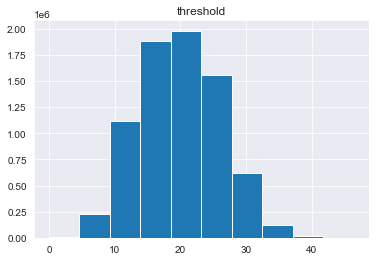

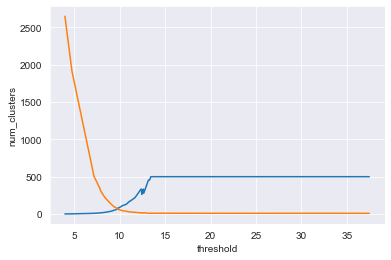

In [7]:
birch_threshold_plot(X_32, ds_32)

(5000, 5000)
(6807582,)


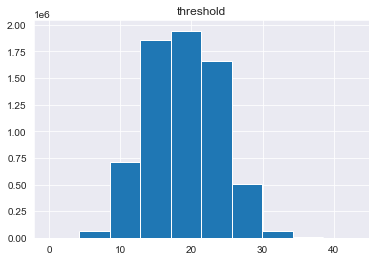

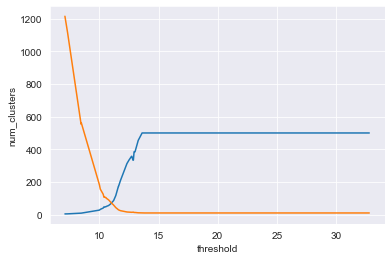

In [8]:
birch_threshold_plot(X_128, ds_128)

(5000, 5000)
(6348792,)


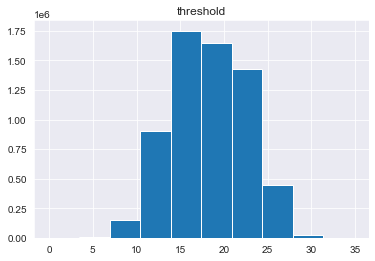

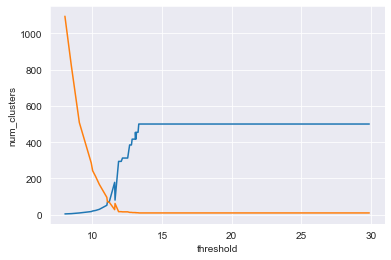

In [9]:
birch_threshold_plot(X_512, ds_512)

(5000, 5000)
(7233553,)


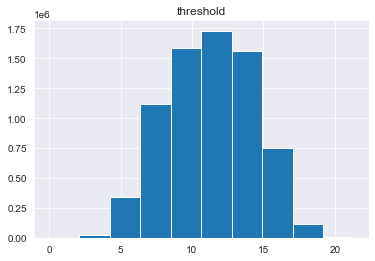

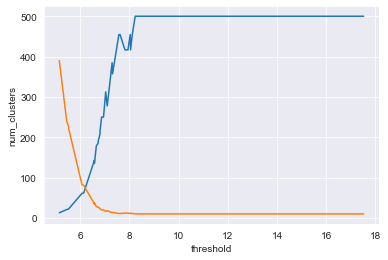

In [9]:
birch_threshold_plot(X_orig, ds_orig)

# Dim 32

In [22]:
dim32_cp = ClusterPlot(learning_rate=0.5, 
            n_iter=1, 
            batch_size=0,
            anchors_method='birch',
            birch_threshold=7,
            dataset='FashionMNISTAE',
            class_to_label=ds_32.class_to_label,
            show_fig=True,
            save_fig=True,
#             k=20,
            k=250,
            random_state=RANDOM_STATE,
            save_fig_every=10,
            magnitude_step=True,
            top_greedy=1,
            show_anchors=False,
            supervised=False,
            alpha=[0.5,0.4,0.85,0.7,0.85,1,0.6,0.4,0.5,0.8],
            douglas_peucker_tolerance=0.5,
            smooth_iter=3,
            show_relations=True,
            show_inner_blobs=False,
            random_points_method='voronoi',
            orig_images=ds_32.orig_images,
            annotate_images=False,
            only_inter_relations=False,
            mask_relation_in_same_label=True,
            vmax_overlap = 0.3)
print(dim32_cp)


ClusterPlot
addr:@de4e88
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=7
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=250
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=1
magnitude_step=True
n_iter=1
batch_size=0
stop_criteria=1e-05
loss_func=<function ClusterPlot.l_inf_loss at 0x000001D7F9E915E8>
loss='Linf'
only_inter_relations=False
learning_rate=0.5
mask_sparse_subcluster=None
random_points_method='voronoi'
class_to_label={6: '6_Shirt', 3: '3_Dress', 0: '0_T-shirt/top', 5: '5_Sandal', 2: '2_Pullover', 9: '9_Ankle boot', 8: '8_Bag', 1: '1_Trouser', 7: '7_Sneaker', 4: '4_Coat'}
random_state=42
n_jobs=None
dataset='FashionMNISTAE'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=[0.5, 0.4, 0.85, 0.7, 0.85, 1, 0.6, 0.4, 0.5, 0.8]
douglas_peucker_tolerance=0.5
smoo

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction only anchors
Dim Reduction only anchors - generate random points in low dim per anchor


100%|█████████████████████████████████████████████████████████████████████████████| 5367/5367 [00:29<00:00, 182.55it/s]


Starting iteration 1 loss = 0.3817204301075269
Skipping polygon of label 0 with area 0.0001671871811153025
Skipping polygon of label 2 with area 0.0001671871811153025
Skipping polygon of label 2 with area 0.00016719116717212046
Skipping polygon of label 4 with area 0.0001671871811153025
Skipping polygon of label 5 with area 0.0001671951533239735
Skipping polygon of label 9 with area 0.0001671951533239735


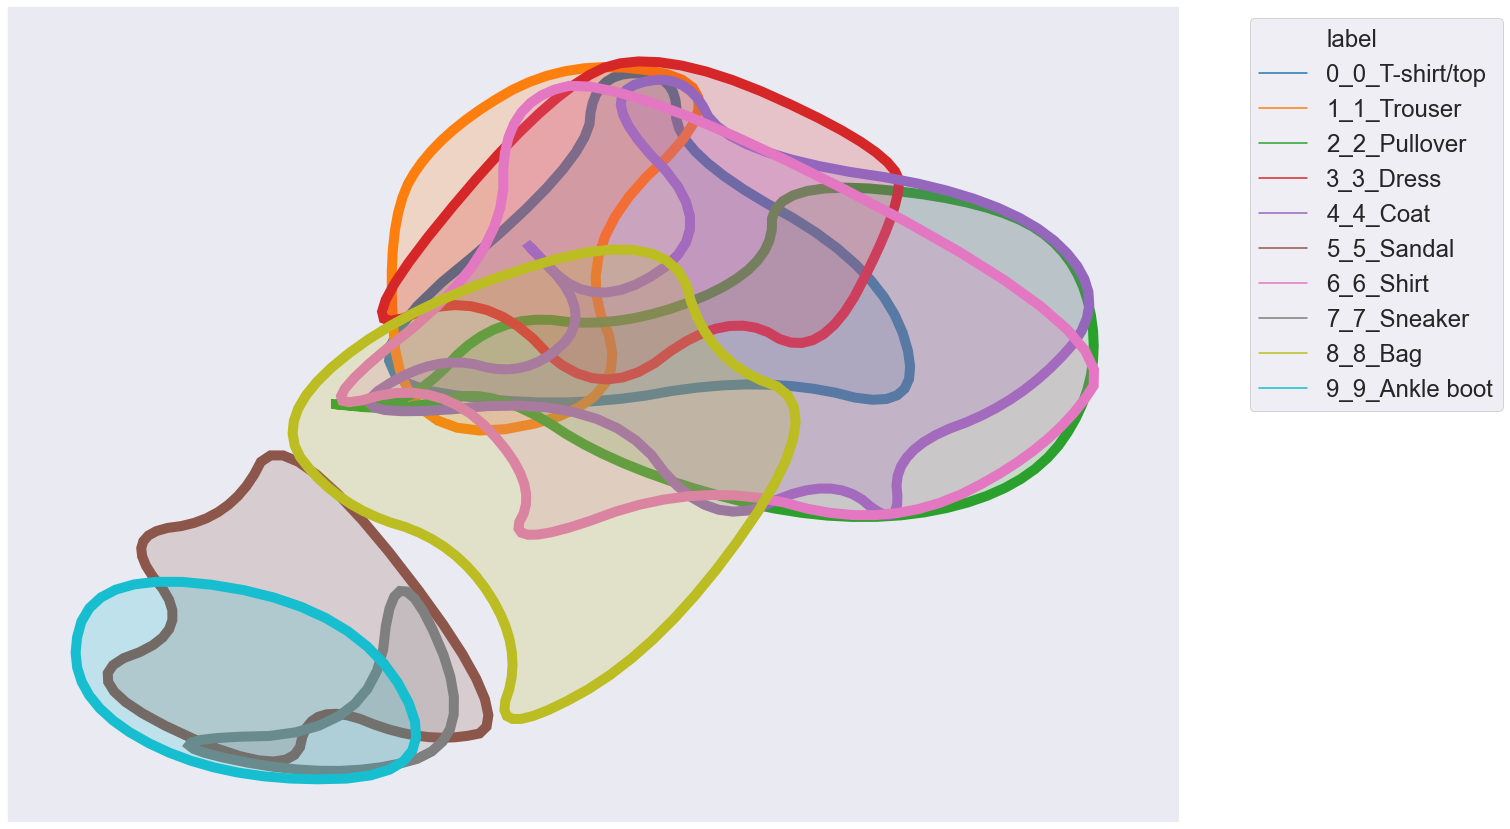

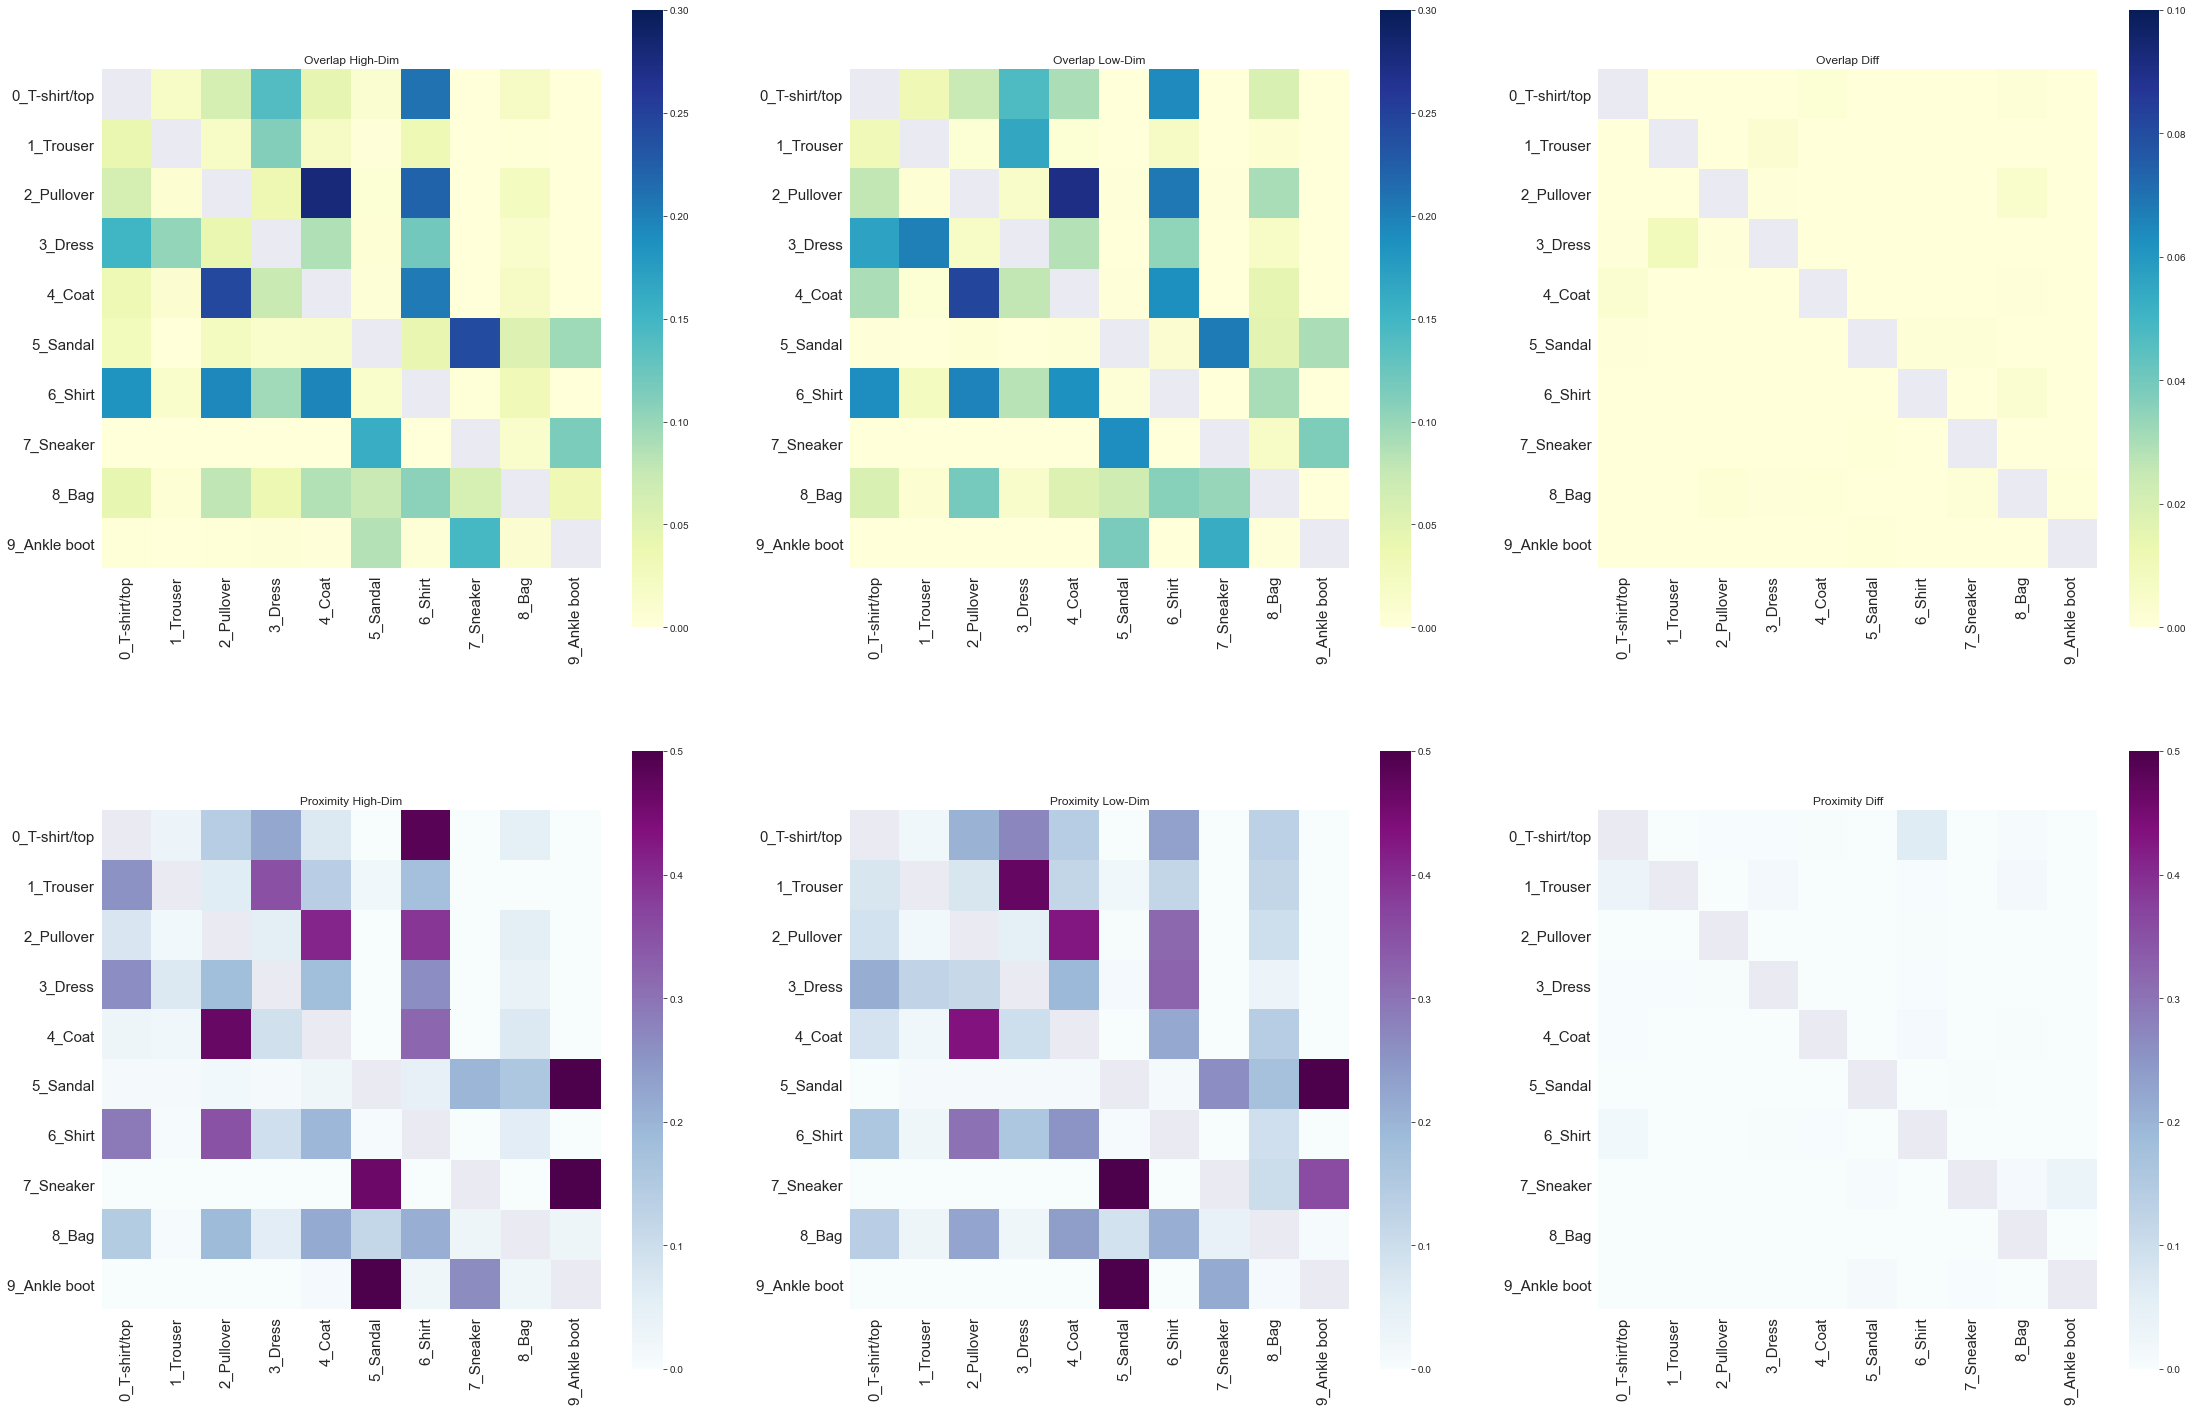

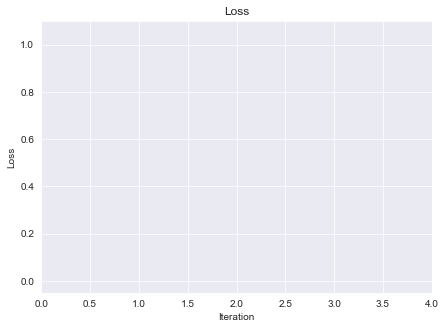

In [23]:
low_dim_32 = dim32_cp.fit_transform(X_32, y_32)

In [153]:
# dim32_cp.alpha = [0.5,0.4,0.85,0.7,0.85,1,0.6,0.4,0.5,0.8]
# dim32_cp.douglas_peucker_tolerance = 0.5
# dim32_cp.skip_polygons_with_area = 0.01
# dim32_cp.anchors_plot_sns_separate(0, True)

# Dim 128

In [42]:
dim128_cp = ClusterPlot(learning_rate=0.5, 
            n_iter=1, 
            batch_size=0,
            anchors_method='birch',
            birch_threshold=8.6,
            dataset='FashionMNISTAE',
            class_to_label=ds_128.class_to_label,
            show_fig=True,
            save_fig=True,
#             k=20,
            k=250,
            random_state=RANDOM_STATE,
            save_fig_every=10,
            magnitude_step=True,
            top_greedy=1,
            show_anchors=False,
            supervised=False,
            alpha=[0.7,0.7,0.6,0.5,0.8,0.7,0.8,0,1,0.5],
            douglas_peucker_tolerance=0.5,
            smooth_iter=3,
            show_relations=True,
            show_inner_blobs=False,
            random_points_method='voronoi',
            orig_images=ds_128.orig_images,
            annotate_images=False,
            only_inter_relations=False,
            mask_relation_in_same_label=True,
            vmax_overlap = 0.3)
print(dim128_cp)


ClusterPlot
addr:@8d4308
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=8.6
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=250
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=1
magnitude_step=True
n_iter=1
batch_size=0
stop_criteria=1e-05
loss_func=<function ClusterPlot.l_inf_loss at 0x000001D7F9E915E8>
loss='Linf'
only_inter_relations=False
learning_rate=0.5
mask_sparse_subcluster=None
random_points_method='voronoi'
class_to_label={6: '6_Shirt', 3: '3_Dress', 0: '0_T-shirt/top', 5: '5_Sandal', 2: '2_Pullover', 9: '9_Ankle boot', 8: '8_Bag', 1: '1_Trouser', 7: '7_Sneaker', 4: '4_Coat'}
random_state=42
n_jobs=None
dataset='FashionMNISTAE'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=[0.7, 0.7, 0.6, 0.5, 0.8, 0.7, 0.8, 0, 1, 0.5]
douglas_peucker_tolerance=0.5
smooth

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction only anchors
Dim Reduction only anchors - generate random points in low dim per anchor


  0%|▏                                                                              | 16/5353 [00:00<00:33, 157.27it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  1%|▍                                                                              | 33/5353 [00:00<00:33, 157.42it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  1%|▋                                                                              | 48/5353 [00:00<00:34, 151.96it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  1%|█                                                                              | 76/5353 [00:00<00:41, 127.46it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  2%|█▍                                                                             | 96/5353 [00:00<00:37, 141.00it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  2%|█▉                                                                            | 130/5353 [00:00<00:34, 149.88it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  3%|██▍                                                                           | 166/5353 [00:01<00:31, 163.13it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  3%|██▋                                                                           | 183/5353 [00:01<00:34, 149.20it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  4%|███▏                                                                          | 215/5353 [00:01<00:38, 132.38it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  4%|███▍                                                                          | 232/5353 [00:01<00:36, 141.53it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  5%|███▌                                                                          | 247/5353 [00:01<00:39, 128.56it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  5%|████▏                                                                         | 284/5353 [00:01<00:33, 150.53it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  6%|████▎                                                                         | 300/5353 [00:02<00:33, 151.20it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  6%|█████                                                                         | 346/5353 [00:02<00:35, 140.59it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  7%|█████▎                                                                        | 361/5353 [00:02<00:42, 116.15it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  7%|█████▋                                                                        | 387/5353 [00:02<00:48, 101.49it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  7%|█████▊                                                                        | 399/5353 [00:02<00:49, 100.10it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  9%|██████▊                                                                       | 468/5353 [00:03<00:40, 121.60it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  9%|███████                                                                       | 482/5353 [00:03<00:46, 105.53it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


  9%|███████▍                                                                       | 505/5353 [00:03<00:49, 97.89it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 10%|████████                                                                       | 549/5353 [00:04<00:49, 97.99it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 11%|████████▊                                                                      | 594/5353 [00:04<00:51, 92.28it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 11%|████████▉                                                                     | 610/5353 [00:05<00:46, 100.96it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 12%|█████████▏                                                                     | 621/5353 [00:05<00:58, 80.29it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 12%|█████████▎                                                                     | 631/5353 [00:05<01:02, 75.37it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 12%|█████████▋                                                                    | 662/5353 [00:05<00:46, 100.60it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 13%|█████████▊                                                                    | 676/5353 [00:05<00:42, 109.69it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 13%|██████████                                                                    | 689/5353 [00:05<00:46, 100.04it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 13%|██████████▏                                                                   | 701/5353 [00:05<00:44, 104.82it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 13%|██████████▍                                                                   | 713/5353 [00:06<00:42, 108.73it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 14%|███████████▏                                                                  | 767/5353 [00:06<00:40, 112.55it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 15%|███████████▌                                                                  | 791/5353 [00:06<00:45, 100.79it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 15%|███████████▊                                                                  | 809/5353 [00:06<00:40, 111.86it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 15%|████████████                                                                  | 827/5353 [00:07<00:36, 124.43it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 16%|████████████▌                                                                 | 860/5353 [00:07<00:32, 139.83it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 16%|████████████▊                                                                 | 877/5353 [00:07<00:30, 145.52it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 17%|█████████████                                                                 | 893/5353 [00:07<00:30, 148.03it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 17%|█████████████▎                                                                | 911/5353 [00:07<00:29, 150.59it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 17%|█████████████▌                                                                | 928/5353 [00:07<00:29, 150.66it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 18%|█████████████▊                                                                | 949/5353 [00:07<00:27, 162.34it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 18%|██████████████                                                                | 966/5353 [00:07<00:31, 137.90it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 18%|██████████████▎                                                               | 981/5353 [00:08<00:31, 137.54it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 19%|██████████████▌                                                               | 996/5353 [00:08<00:33, 128.50it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 19%|██████████████▌                                                              | 1010/5353 [00:08<00:35, 123.16it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 20%|███████████████▍                                                             | 1070/5353 [00:08<00:32, 132.04it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 20%|███████████████▌                                                             | 1085/5353 [00:08<00:32, 129.95it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 21%|███████████████▉                                                             | 1112/5353 [00:09<00:39, 108.57it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 21%|████████████████▍                                                            | 1147/5353 [00:09<00:31, 133.43it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 22%|████████████████▊                                                            | 1166/5353 [00:09<00:29, 142.97it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 22%|█████████████████                                                            | 1183/5353 [00:09<00:28, 147.50it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 23%|█████████████████▍                                                           | 1215/5353 [00:09<00:27, 152.20it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 23%|█████████████████▋                                                           | 1231/5353 [00:09<00:30, 134.71it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 23%|█████████████████▉                                                           | 1246/5353 [00:10<00:30, 134.94it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 24%|██████████████████▏                                                          | 1261/5353 [00:10<00:30, 134.74it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 24%|██████████████████▎                                                          | 1277/5353 [00:10<00:29, 138.96it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 24%|██████████████████▊                                                          | 1306/5353 [00:10<00:30, 132.07it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 25%|██████████████████▉                                                          | 1320/5353 [00:10<00:30, 133.68it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 25%|███████████████████▏                                                         | 1336/5353 [00:10<00:29, 137.45it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 26%|███████████████████▉                                                         | 1387/5353 [00:11<00:26, 152.15it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 27%|████████████████████▍                                                        | 1420/5353 [00:11<00:25, 154.23it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 27%|████████████████████▉                                                        | 1455/5353 [00:11<00:24, 157.76it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 27%|█████████████████████▏                                                       | 1472/5353 [00:11<00:26, 147.53it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 28%|█████████████████████▍                                                       | 1491/5353 [00:11<00:24, 156.68it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 28%|█████████████████████▋                                                       | 1508/5353 [00:11<00:24, 158.77it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 28%|█████████████████████▉                                                       | 1525/5353 [00:11<00:25, 150.90it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 29%|██████████████████████▏                                                      | 1544/5353 [00:12<00:24, 157.35it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 29%|██████████████████████▍                                                      | 1561/5353 [00:12<00:30, 126.32it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 29%|██████████████████████▋                                                      | 1575/5353 [00:12<00:30, 124.01it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 30%|███████████████████████▏                                                     | 1614/5353 [00:12<00:26, 143.77it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 31%|███████████████████████▍                                                     | 1633/5353 [00:12<00:24, 153.01it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 31%|███████████████████████▊                                                     | 1652/5353 [00:12<00:22, 161.38it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 32%|████████████████████████▌                                                    | 1706/5353 [00:13<00:24, 147.95it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 32%|████████████████████████▊                                                    | 1722/5353 [00:13<00:30, 120.98it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 32%|█████████████████████████                                                    | 1739/5353 [00:13<00:27, 131.29it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 33%|█████████████████████████▏                                                   | 1754/5353 [00:13<00:27, 131.48it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 33%|█████████████████████████▍                                                   | 1769/5353 [00:13<00:26, 135.52it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 34%|█████████████████████████▉                                                   | 1800/5353 [00:13<00:26, 133.14it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 34%|██████████████████████████                                                   | 1815/5353 [00:13<00:26, 136.02it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 34%|██████████████████████████▌                                                  | 1844/5353 [00:14<00:29, 119.73it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 35%|██████████████████████████▋                                                  | 1859/5353 [00:14<00:27, 125.93it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 35%|███████████████████████████                                                  | 1879/5353 [00:14<00:24, 139.67it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 35%|███████████████████████████▏                                                 | 1894/5353 [00:14<00:24, 139.16it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 36%|███████████████████████████▍                                                 | 1909/5353 [00:14<00:26, 130.15it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 36%|███████████████████████████▋                                                 | 1923/5353 [00:14<00:28, 122.27it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 37%|████████████████████████████▊                                                | 2007/5353 [00:15<00:22, 150.08it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 38%|█████████████████████████████                                                | 2023/5353 [00:15<00:22, 146.74it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 38%|█████████████████████████████▎                                               | 2039/5353 [00:15<00:22, 146.46it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 40%|██████████████████████████████▍                                              | 2117/5353 [00:16<00:20, 161.34it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 40%|██████████████████████████████▋                                              | 2134/5353 [00:16<00:19, 163.50it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 40%|███████████████████████████████▏                                             | 2167/5353 [00:16<00:22, 139.51it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 41%|███████████████████████████████▋                                             | 2206/5353 [00:16<00:20, 151.66it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 42%|███████████████████████████████▉                                             | 2222/5353 [00:16<00:24, 129.23it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 42%|████████████████████████████████▏                                            | 2236/5353 [00:16<00:26, 117.13it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 42%|████████████████████████████████▌                                            | 2261/5353 [00:17<00:28, 109.10it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 43%|████████████████████████████████▊                                            | 2278/5353 [00:17<00:25, 121.00it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 43%|████████████████████████████████▉                                            | 2291/5353 [00:17<00:24, 122.96it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 43%|█████████████████████████████████▏                                           | 2309/5353 [00:17<00:22, 135.34it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 43%|█████████████████████████████████▍                                           | 2324/5353 [00:17<00:25, 117.32it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 44%|█████████████████████████████████▋                                           | 2339/5353 [00:17<00:24, 125.29it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 44%|██████████████████████████████████▎                                          | 2382/5353 [00:18<00:25, 116.13it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 45%|██████████████████████████████████▍                                          | 2396/5353 [00:18<00:24, 121.21it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 45%|██████████████████████████████████▋                                          | 2410/5353 [00:18<00:23, 125.70it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 45%|██████████████████████████████████▊                                          | 2423/5353 [00:18<00:23, 123.10it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 46%|███████████████████████████████████▏                                         | 2450/5353 [00:18<00:23, 121.69it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 46%|███████████████████████████████████▋                                         | 2478/5353 [00:18<00:23, 122.25it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 47%|███████████████████████████████████▉                                         | 2496/5353 [00:19<00:21, 133.55it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 47%|████████████████████████████████████                                         | 2510/5353 [00:19<00:22, 124.35it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 48%|████████████████████████████████████▋                                        | 2553/5353 [00:19<00:20, 133.37it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 48%|████████████████████████████████████▉                                        | 2568/5353 [00:19<00:20, 136.55it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 49%|█████████████████████████████████████▌                                       | 2610/5353 [00:19<00:20, 132.11it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 49%|█████████████████████████████████████▋                                       | 2624/5353 [00:19<00:20, 133.70it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 50%|██████████████████████████████████████▍                                      | 2669/5353 [00:20<00:22, 119.39it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 50%|██████████████████████████████████████▌                                      | 2682/5353 [00:20<00:23, 115.02it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 50%|██████████████████████████████████████▊                                      | 2695/5353 [00:20<00:23, 111.28it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 51%|██████████████████████████████████████▉                                      | 2707/5353 [00:20<00:23, 111.01it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 51%|███████████████████████████████████████                                      | 2719/5353 [00:20<00:25, 102.07it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 51%|███████████████████████████████████████▎                                     | 2734/5353 [00:21<00:23, 111.70it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 51%|████████████████████████████████████████                                      | 2746/5353 [00:21<00:26, 97.49it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 52%|███████████████████████████████████████▋                                     | 2762/5353 [00:21<00:23, 108.92it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 52%|████████████████████████████████████████                                     | 2788/5353 [00:21<00:21, 117.37it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 52%|████████████████████████████████████████▎                                    | 2801/5353 [00:21<00:24, 102.93it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 53%|████████████████████████████████████████▌                                    | 2820/5353 [00:21<00:21, 118.28it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 53%|████████████████████████████████████████▊                                    | 2834/5353 [00:21<00:22, 113.86it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 53%|████████████████████████████████████████▉                                    | 2847/5353 [00:21<00:21, 118.03it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 54%|█████████████████████████████████████████▏                                   | 2864/5353 [00:22<00:19, 125.99it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 54%|█████████████████████████████████████████▍                                   | 2883/5353 [00:22<00:18, 137.20it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 54%|█████████████████████████████████████████▋                                   | 2898/5353 [00:22<00:18, 132.35it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 55%|██████████████████████████████████████████                                   | 2925/5353 [00:22<00:19, 122.74it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 55%|██████████████████████████████████████████▍                                  | 2954/5353 [00:22<00:19, 123.43it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 55%|██████████████████████████████████████████▋                                  | 2968/5353 [00:22<00:18, 127.36it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 56%|██████████████████████████████████████████▉                                  | 2984/5353 [00:23<00:17, 135.05it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 57%|███████████████████████████████████████████▌                                 | 3028/5353 [00:23<00:19, 119.44it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 57%|███████████████████████████████████████████▊                                 | 3042/5353 [00:23<00:20, 114.49it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 57%|███████████████████████████████████████████▉                                 | 3056/5353 [00:23<00:19, 118.73it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 57%|████████████████████████████████████████████▏                                | 3071/5353 [00:23<00:19, 117.80it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 58%|████████████████████████████████████████████▍                                | 3089/5353 [00:23<00:17, 131.21it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 59%|█████████████████████████████████████████████                                | 3132/5353 [00:24<00:17, 128.02it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 59%|█████████████████████████████████████████████▌                               | 3164/5353 [00:24<00:15, 140.37it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 60%|██████████████████████████████████████████████                               | 3199/5353 [00:24<00:15, 141.79it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 60%|██████████████████████████████████████████████▏                              | 3214/5353 [00:24<00:17, 125.81it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 60%|██████████████████████████████████████████████▍                              | 3231/5353 [00:24<00:16, 131.78it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 61%|██████████████████████████████████████████████▋                              | 3249/5353 [00:25<00:15, 136.86it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 62%|███████████████████████████████████████████████▎                             | 3293/5353 [00:25<00:16, 123.79it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 62%|███████████████████████████████████████████████▌                             | 3306/5353 [00:25<00:17, 118.81it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 62%|████████████████████████████████████████████████                             | 3342/5353 [00:25<00:14, 142.40it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 63%|████████████████████████████████████████████████▎                            | 3357/5353 [00:25<00:15, 130.40it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 64%|█████████████████████████████████████████████████▎                           | 3424/5353 [00:26<00:14, 129.24it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 64%|█████████████████████████████████████████████████▍                           | 3438/5353 [00:26<00:15, 127.36it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 65%|█████████████████████████████████████████████████▊                           | 3459/5353 [00:26<00:13, 143.30it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 65%|█████████████████████████████████████████████████▉                           | 3475/5353 [00:26<00:14, 133.87it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 65%|██████████████████████████████████████████████████▏                          | 3490/5353 [00:26<00:15, 123.74it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 66%|██████████████████████████████████████████████████▍                          | 3507/5353 [00:26<00:13, 132.93it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 67%|███████████████████████████████████████████████████▋                         | 3596/5353 [00:27<00:12, 136.07it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 67%|███████████████████████████████████████████████████▉                         | 3612/5353 [00:27<00:12, 140.30it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 68%|████████████████████████████████████████████████████▏                        | 3627/5353 [00:27<00:13, 124.99it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 68%|████████████████████████████████████████████████████▎                        | 3641/5353 [00:27<00:13, 126.44it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 68%|████████████████████████████████████████████████████▌                        | 3655/5353 [00:28<00:13, 124.76it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 69%|████████████████████████████████████████████████████▊                        | 3671/5353 [00:28<00:12, 131.37it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 69%|█████████████████████████████████████████████████████                        | 3691/5353 [00:28<00:11, 146.21it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 69%|█████████████████████████████████████████████████████▎                       | 3709/5353 [00:28<00:10, 152.29it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 70%|█████████████████████████████████████████████████████▋                       | 3730/5353 [00:28<00:09, 165.29it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 70%|█████████████████████████████████████████████████████▉                       | 3748/5353 [00:28<00:09, 168.14it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 70%|██████████████████████████████████████████████████████▏                      | 3766/5353 [00:28<00:10, 157.30it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 71%|██████████████████████████████████████████████████████▉                      | 3821/5353 [00:29<00:09, 160.09it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 72%|███████████████████████████████████████████████████████▋                     | 3872/5353 [00:29<00:10, 147.76it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 74%|█████████████████████████████████████████████████████████▏                   | 3978/5353 [00:30<00:10, 131.07it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 75%|█████████████████████████████████████████████████████████▍                   | 3993/5353 [00:30<00:10, 135.22it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 75%|█████████████████████████████████████████████████████████▋                   | 4007/5353 [00:30<00:09, 135.14it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 75%|█████████████████████████████████████████████████████████▊                   | 4022/5353 [00:30<00:09, 138.99it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 76%|██████████████████████████████████████████████████████████▌                  | 4072/5353 [00:30<00:08, 147.41it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 76%|██████████████████████████████████████████████████████████▊                  | 4088/5353 [00:30<00:08, 146.92it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 77%|███████████████████████████████████████████████████████████                  | 4105/5353 [00:31<00:08, 151.24it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 77%|███████████████████████████████████████████████████████████▎                 | 4124/5353 [00:31<00:07, 157.21it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 78%|███████████████████████████████████████████████████████████▉                 | 4171/5353 [00:31<00:09, 129.82it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 79%|████████████████████████████████████████████████████████████▉                | 4240/5353 [00:32<00:07, 151.30it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 80%|█████████████████████████████████████████████████████████████▏               | 4256/5353 [00:32<00:07, 142.44it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 80%|█████████████████████████████████████████████████████████████▋               | 4286/5353 [00:32<00:07, 144.11it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 81%|██████████████████████████████████████████████████████████████               | 4317/5353 [00:32<00:07, 144.14it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 82%|██████████████████████████████████████████████████████████████▉              | 4377/5353 [00:33<00:07, 137.92it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 82%|███████████████████████████████████████████████████████████████▏             | 4391/5353 [00:33<00:07, 123.62it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 82%|███████████████████████████████████████████████████████████████▍             | 4406/5353 [00:33<00:07, 126.32it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 83%|███████████████████████████████████████████████████████████████▌             | 4419/5353 [00:33<00:07, 125.65it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 83%|███████████████████████████████████████████████████████████████▊             | 4433/5353 [00:33<00:07, 127.96it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 83%|███████████████████████████████████████████████████████████████▉             | 4447/5353 [00:33<00:07, 128.55it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 83%|████████████████████████████████████████████████████████████████▏            | 4460/5353 [00:33<00:07, 115.06it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 84%|████████████████████████████████████████████████████████████████▌            | 4486/5353 [00:33<00:07, 112.59it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 84%|█████████████████████████████████████████████████████████████████▋            | 4510/5353 [00:34<00:09, 91.12it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 85%|██████████████████████████████████████████████████████████████████            | 4533/5353 [00:34<00:08, 98.65it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 85%|█████████████████████████████████████████████████████████████████▋           | 4564/5353 [00:34<00:07, 107.22it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 86%|█████████████████████████████████████████████████████████████████▉           | 4585/5353 [00:34<00:06, 124.40it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 86%|██████████████████████████████████████████████████████████████████▏          | 4603/5353 [00:34<00:05, 136.56it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 87%|██████████████████████████████████████████████████████████████████▋          | 4634/5353 [00:35<00:05, 134.74it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 87%|██████████████████████████████████████████████████████████████████▊          | 4649/5353 [00:35<00:05, 133.54it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 87%|███████████████████████████████████████████████████████████████████          | 4663/5353 [00:35<00:05, 117.78it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 88%|███████████████████████████████████████████████████████████████████▌         | 4701/5353 [00:35<00:04, 144.07it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 88%|███████████████████████████████████████████████████████████████████▊         | 4717/5353 [00:35<00:04, 141.91it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 89%|████████████████████████████████████████████████████████████████████▊        | 4787/5353 [00:36<00:03, 156.82it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 90%|█████████████████████████████████████████████████████████████████████        | 4804/5353 [00:36<00:03, 152.47it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 90%|█████████████████████████████████████████████████████████████████████▌       | 4835/5353 [00:36<00:03, 134.63it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 91%|█████████████████████████████████████████████████████████████████████▊       | 4849/5353 [00:36<00:04, 114.04it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 91%|██████████████████████████████████████████████████████████████████████▏      | 4883/5353 [00:36<00:03, 132.30it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 92%|██████████████████████████████████████████████████████████████████████▍      | 4901/5353 [00:37<00:03, 137.87it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 92%|██████████████████████████████████████████████████████████████████████▋      | 4917/5353 [00:37<00:03, 130.91it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error
anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 92%|██████████████████████████████████████████████████████████████████████▉      | 4931/5353 [00:37<00:03, 114.34it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 93%|███████████████████████████████████████████████████████████████████████▍     | 4962/5353 [00:37<00:03, 128.19it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 93%|███████████████████████████████████████████████████████████████████████▌     | 4978/5353 [00:37<00:02, 135.72it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


 93%|███████████████████████████████████████████████████████████████████████▊     | 4993/5353 [00:37<00:02, 129.68it/s]

anchor 254 has no voronoi region, why? returning anchor instead of random point - probably not error


100%|█████████████████████████████████████████████████████████████████████████████| 5353/5353 [00:37<00:00, 141.37it/s]


Starting iteration 1 loss = 0.6948233068174883
Skipping polygon of label 1 with area 0.0001671871811153025
Skipping polygon of label 2 with area 0.0001671871811153025
Skipping polygon of label 3 with area 0.0001671951533239735
Skipping polygon of label 4 with area 0.00016718929870947197
Skipping polygon of label 4 with area 0.00016719116717212046


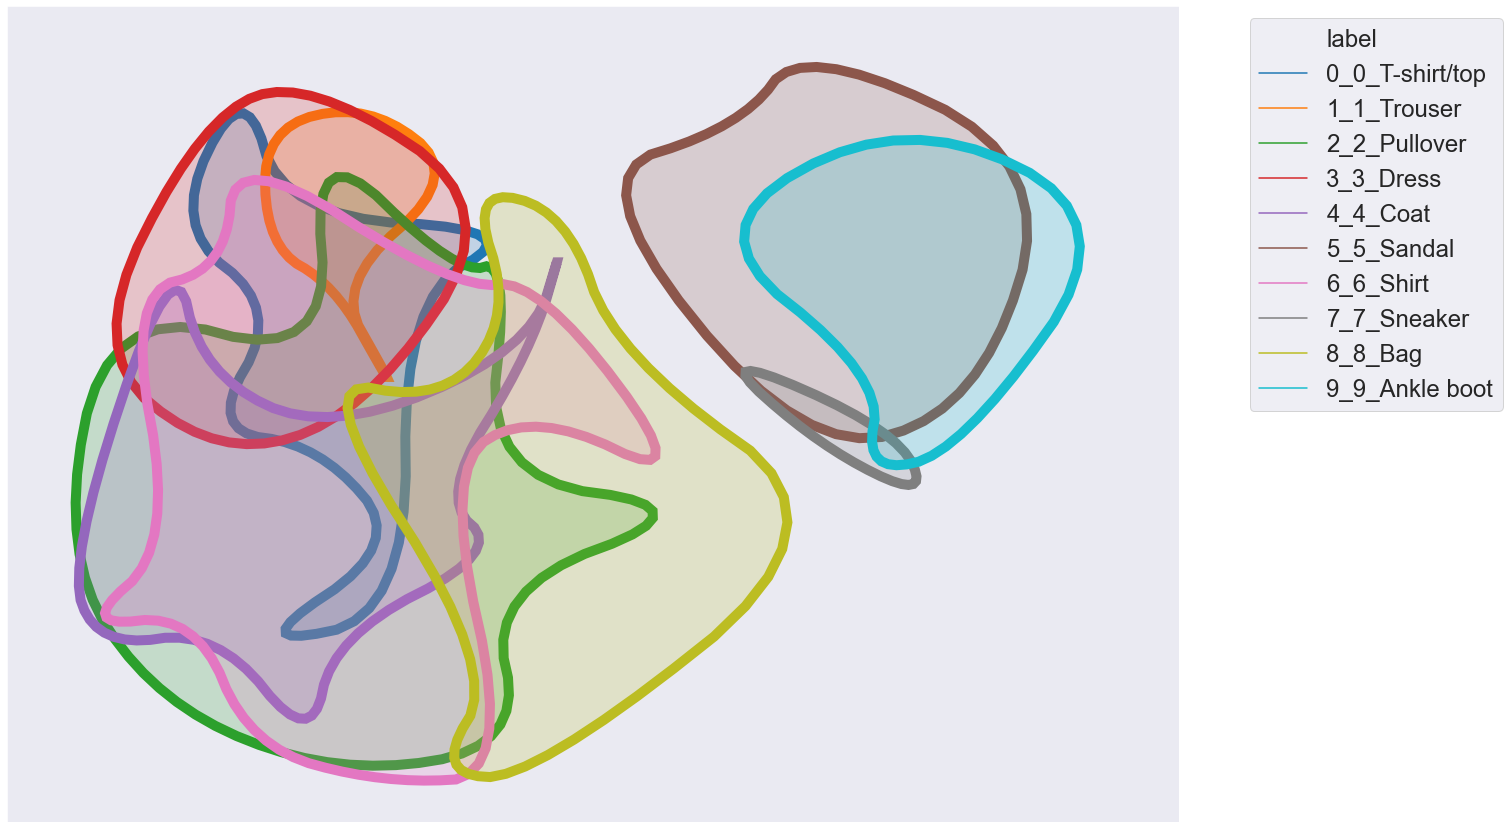

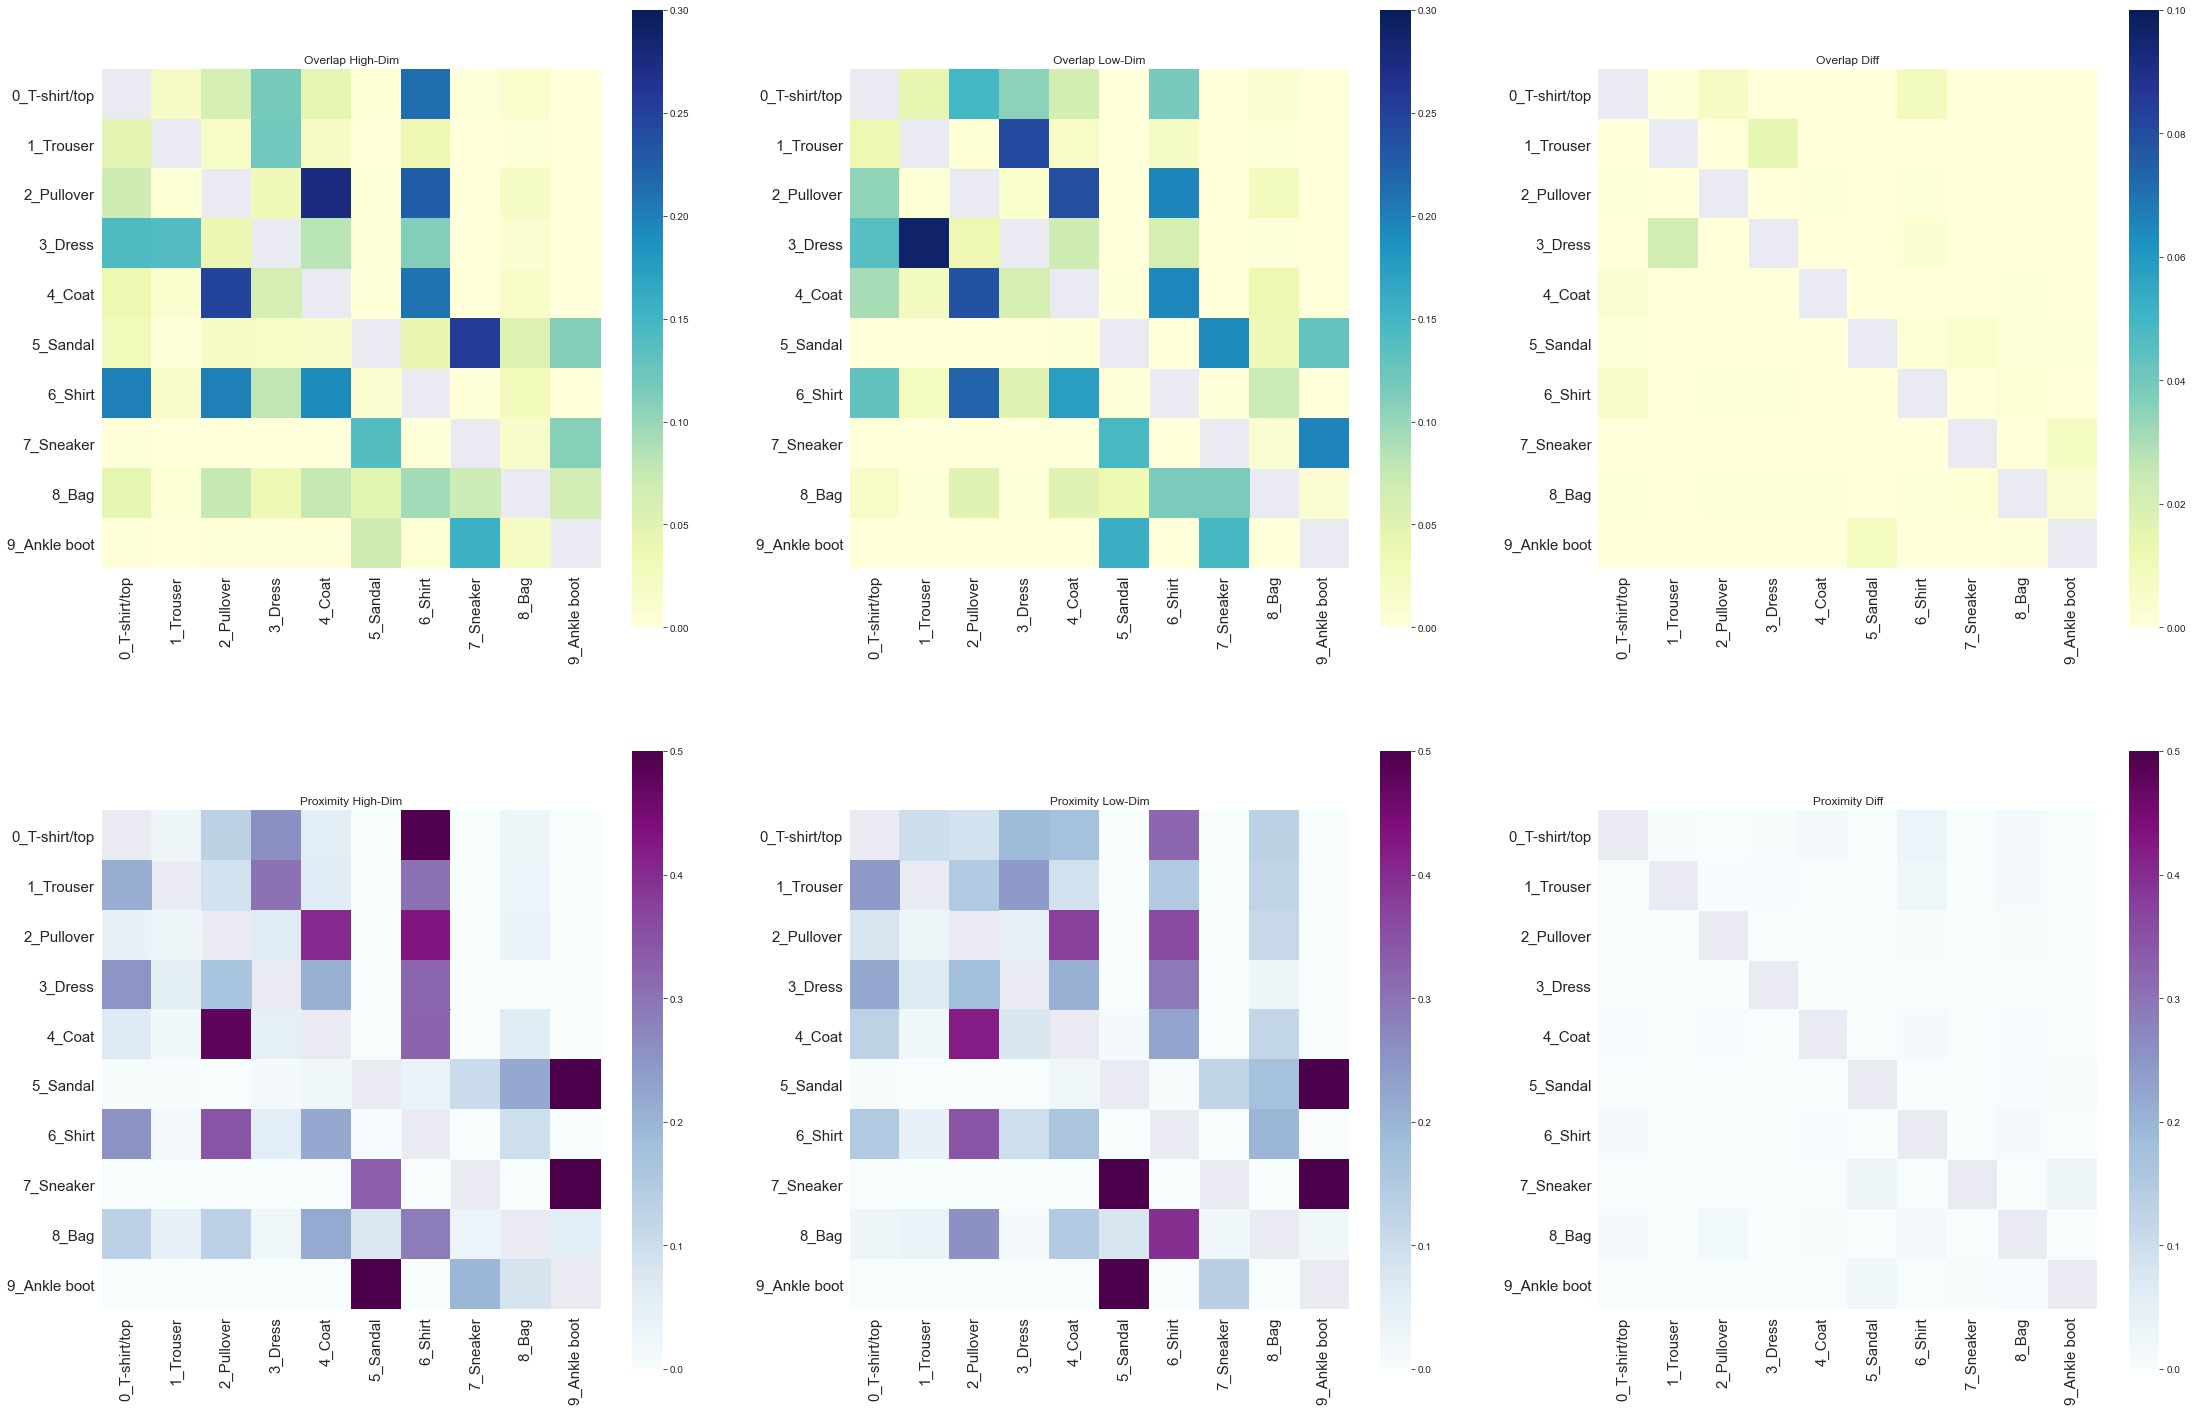

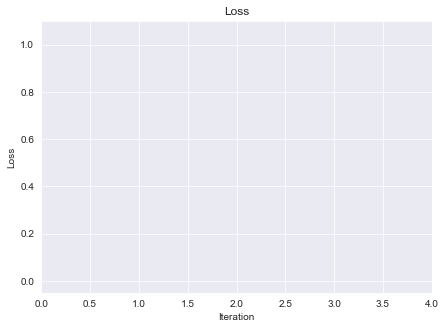

In [43]:
low_dim_128 = dim128_cp.fit_transform(X_128, y_128)

In [44]:
# dim128_cp.alpha = [0.7,0.7,0.6,0.5,0.8,0.7,0.8,0,1,0.5]
# dim128_cp.douglas_peucker_tolerance = 0.5
# dim128_cp.skip_polygons_with_area = 0.01
# dim128_cp.anchors_plot_sns_separate(0, True)

# Dim 512

In [45]:
dim512_cp = ClusterPlot(learning_rate=0.5, 
            n_iter=1, 
            batch_size=0,
            anchors_method='birch',
            birch_threshold=9.1,
            dataset='FashionMNISTAE',
            class_to_label=ds_512.class_to_label,
            show_fig=True,
            save_fig=True,
#             k=20,
            k=250,
            random_state=RANDOM_STATE,
            save_fig_every=10,
            magnitude_step=True,
            top_greedy=1,
            show_anchors=False,
            supervised=False,
            alpha=[0.7,0.7,0.8,0.5,0.5,0.8,0.7,0,1,0.5],
            douglas_peucker_tolerance=0.5,
            smooth_iter=3,
            show_relations=True,
            show_inner_blobs=False,
            random_points_method='voronoi',
            orig_images=ds_512.orig_images,
            annotate_images=False,
            only_inter_relations=False,
            mask_relation_in_same_label=True,
            vmax_overlap = 0.3)
print(dim512_cp)


ClusterPlot
addr:@d37c88
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=9.1
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=250
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=1
magnitude_step=True
n_iter=1
batch_size=0
stop_criteria=1e-05
loss_func=<function ClusterPlot.l_inf_loss at 0x000001D7F9E915E8>
loss='Linf'
only_inter_relations=False
learning_rate=0.5
mask_sparse_subcluster=None
random_points_method='voronoi'
class_to_label={6: '6_Shirt', 3: '3_Dress', 0: '0_T-shirt/top', 5: '5_Sandal', 2: '2_Pullover', 9: '9_Ankle boot', 8: '8_Bag', 1: '1_Trouser', 7: '7_Sneaker', 4: '4_Coat'}
random_state=42
n_jobs=None
dataset='FashionMNISTAE'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=[0.7, 0.7, 0.8, 0.5, 0.5, 0.8, 0.7, 0, 1, 0.5]
douglas_peucker_tolerance=0.5
smooth

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction only anchors
Dim Reduction only anchors - generate random points in low dim per anchor


100%|██████████████████████████████████████████████████████████████████████████████| 5407/5407 [01:09<00:00, 78.22it/s]


Starting iteration 1 loss = 0.7530120481927711
Skipping polygon of label 0 with area 0.00016719116717212046
Skipping polygon of label 0 with area 0.00016719116717212046
Skipping polygon of label 2 with area 0.00016719116717212046
Skipping polygon of label 2 with area 0.00016719116717212046
Skipping polygon of label 8 with area 0.0001671951533239735
Skipping polygon of label 8 with area 0.00016719116717212046


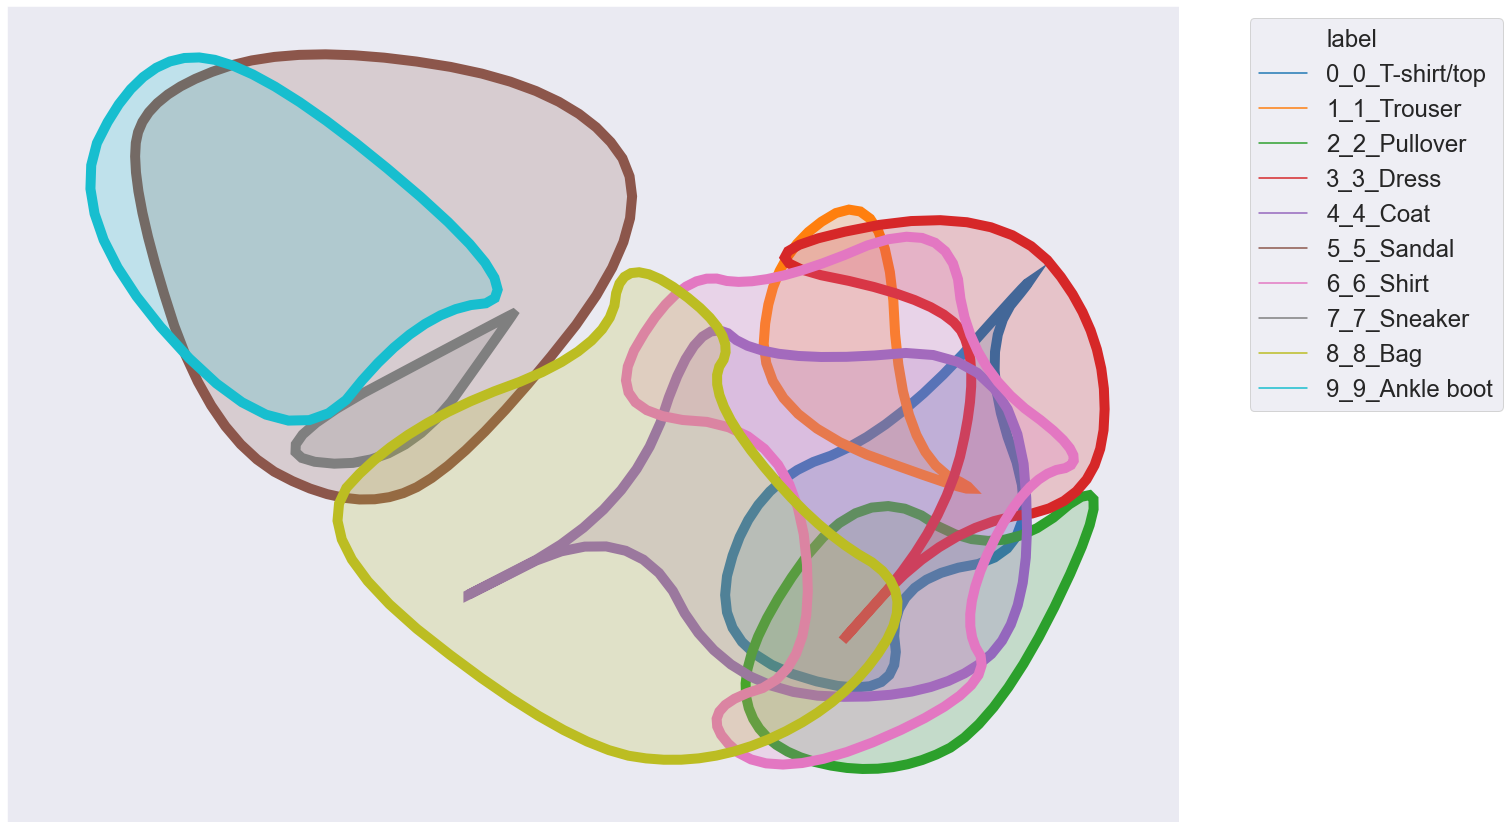

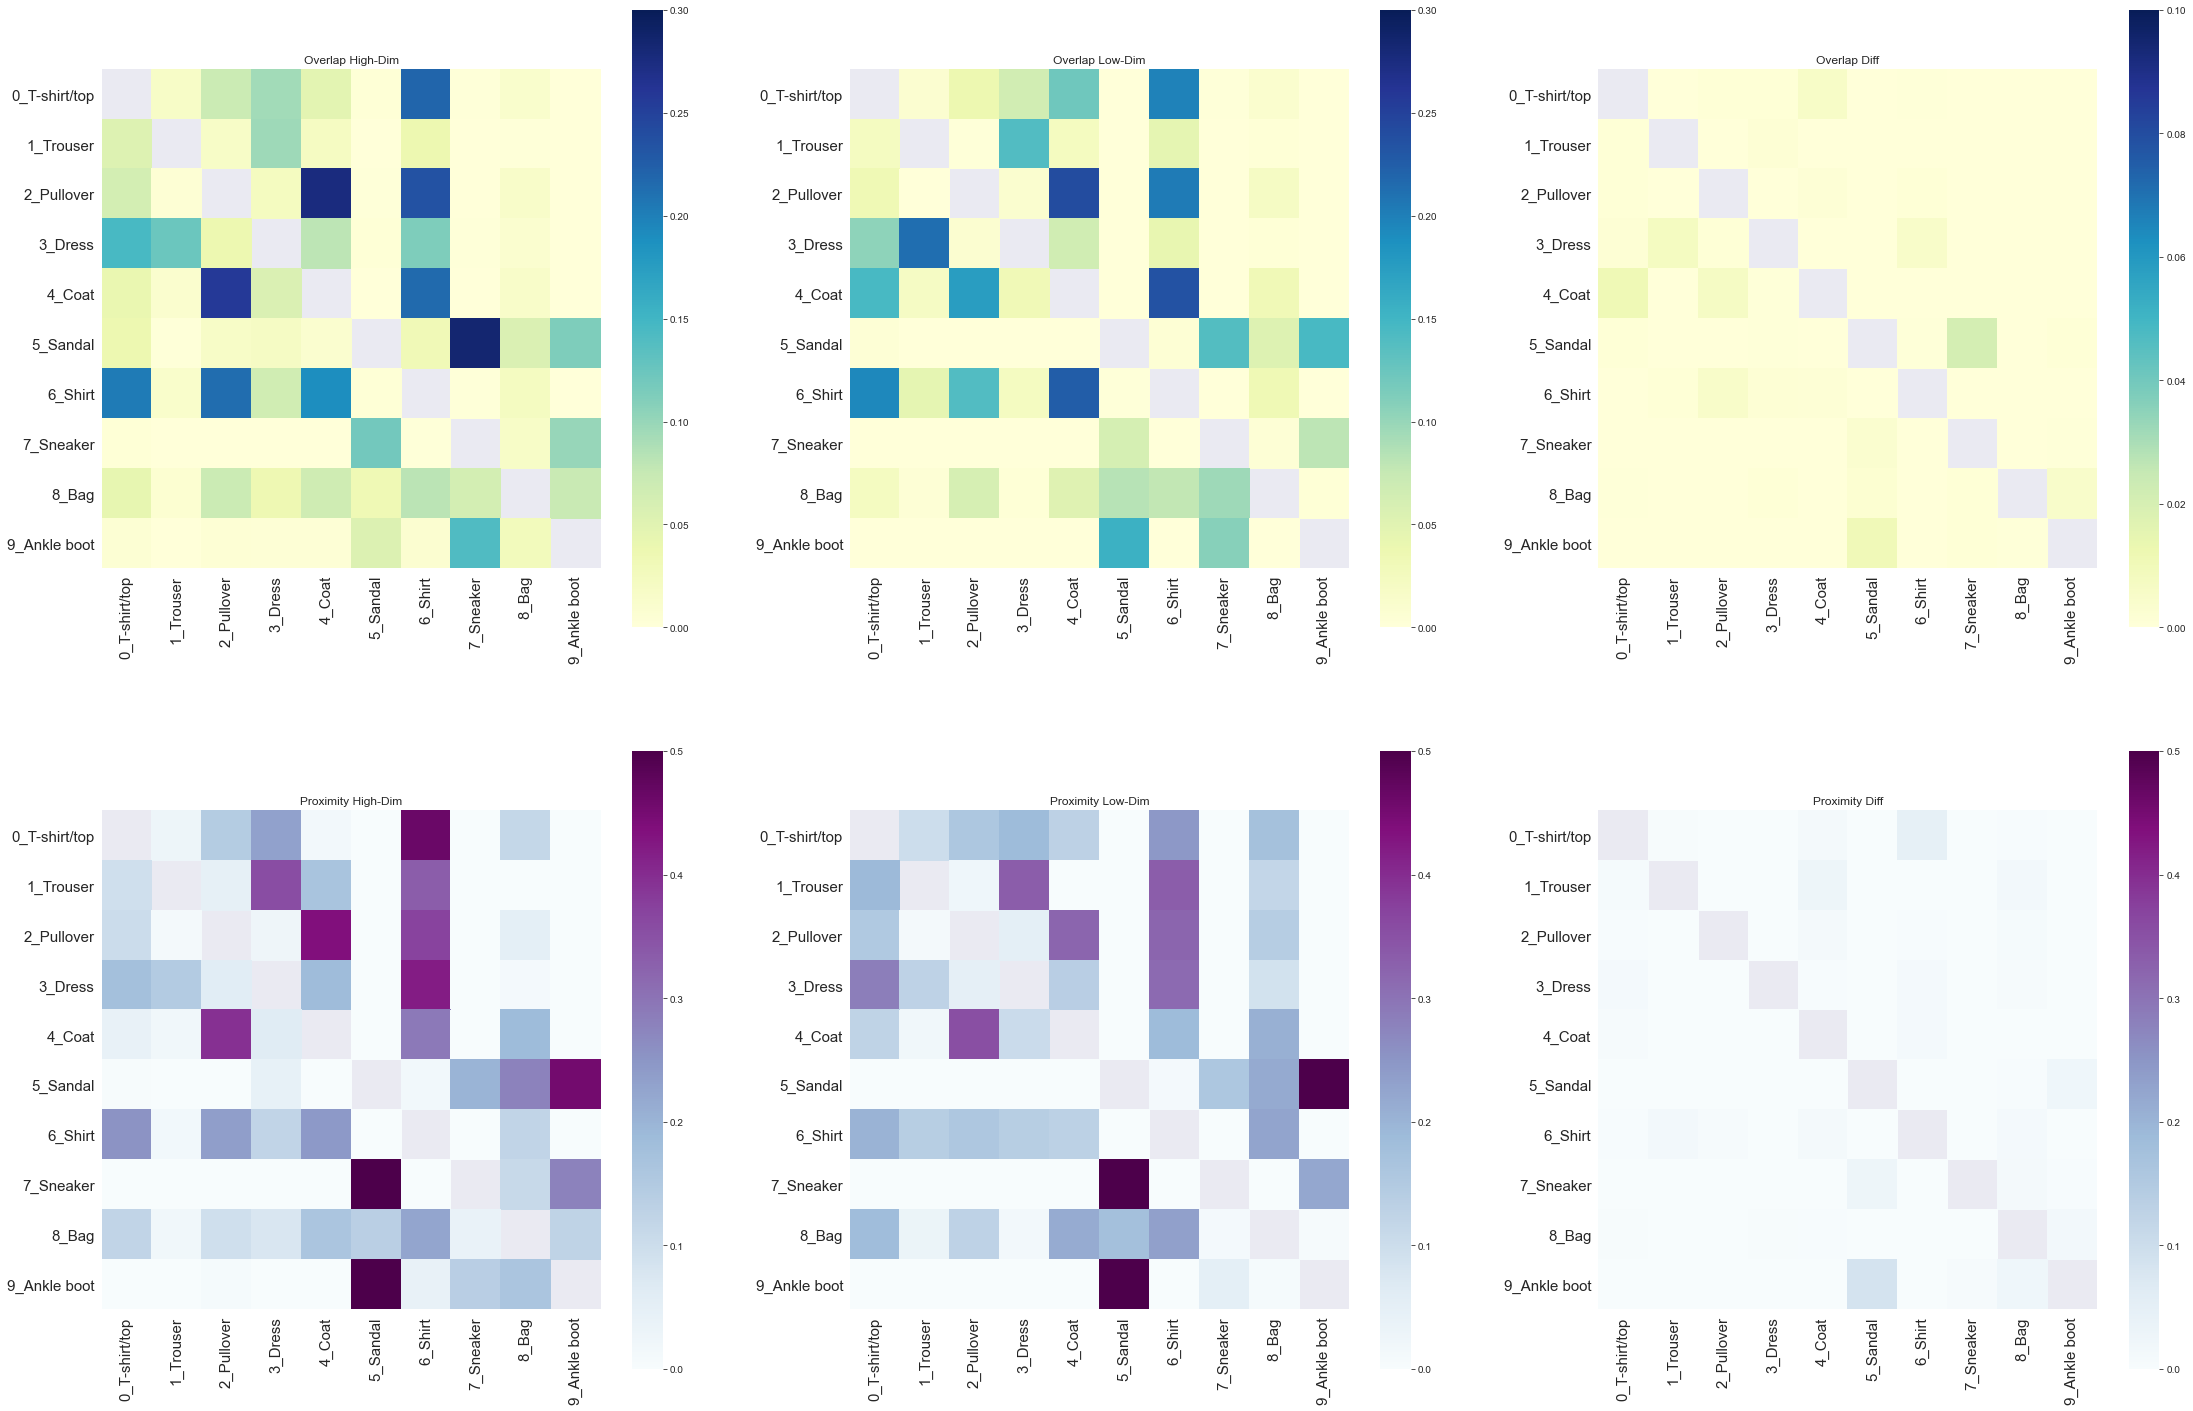

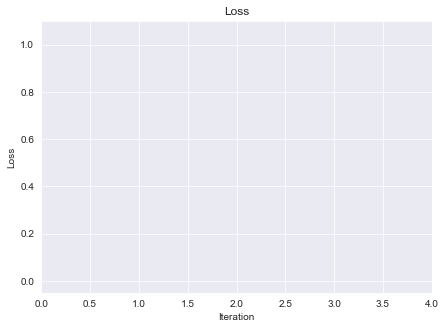

In [51]:
low_dim_512 = dim512_cp.fit_transform(X_512, y_512)

In [159]:
# dim512_cp.alpha = [0.7,0.7,0.8,0.5,0.5,0.8,0.7,0,1,0.5]
# dim512_cp.douglas_peucker_tolerance = 0.5
# dim512_cp.skip_polygons_with_area = 0.01
# dim512_cp.anchors_plot_sns_separate(0, True)

# Original Data

In [82]:
dim_orig_cp = ClusterPlot(learning_rate=0.5, 
            n_iter=1, 
            batch_size=0,
            anchors_method='birch',
            birch_threshold=4.5,
            dataset='FashionMNISTAE',
            class_to_label=ds_orig.class_to_label,
            show_fig=True,
            save_fig=True,
#             k=20,
            k=250,
            random_state=RANDOM_STATE,
            save_fig_every=10,
            magnitude_step=True,
            top_greedy=25,
            show_anchors=False,
            supervised=False,
            alpha=[0.7,0.3,0.6,0.7,0.7,0.8,1,0,0.9,0.5],
            douglas_peucker_tolerance=0.5,
            smooth_iter=3,
            show_relations=True,
            show_inner_blobs=False,
            random_points_method='voronoi',
            orig_images=ds_orig.orig_images,
            annotate_images=False,
            only_inter_relations=False,
            mask_relation_in_same_label=True,
            vmax_overlap = 0.3)
print(dim_orig_cp)


ClusterPlot
addr:@711e88
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=4.5
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=250
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=25
magnitude_step=True
n_iter=1
batch_size=0
stop_criteria=1e-05
loss_func=<function ClusterPlot.l_inf_loss at 0x000001D7F9E915E8>
loss='Linf'
only_inter_relations=False
learning_rate=0.5
mask_sparse_subcluster=None
random_points_method='voronoi'
class_to_label={6: '6_Shirt', 3: '3_Dress', 0: '0_T-shirt/top', 5: '5_Sandal', 2: '2_Pullover', 9: '9_Ankle boot', 8: '8_Bag', 1: '1_Trouser', 7: '7_Sneaker', 4: '4_Coat'}
random_state=42
n_jobs=None
dataset='FashionMNISTAE'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=[0.7, 0.3, 0.6, 0.7, 0.7, 0.8, 1, 0, 0.9, 0.5]
douglas_peucker_tolerance=0.5
smoot

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction only anchors
Dim Reduction only anchors - generate random points in low dim per anchor


100%|██████████████████████████████████████████████████████████████████████████████| 5714/5714 [01:00<00:00, 94.32it/s]


Starting iteration 1 loss = 0.7791164658634537
Skipping polygon of label 0 with area 0.00016719116717212046
Skipping polygon of label 2 with area 0.00016719116717212046
Skipping polygon of label 3 with area 0.0001671951533239735
Skipping polygon of label 4 with area 0.009802506702441732
Skipping polygon of label 6 with area 0.0001671871811153025


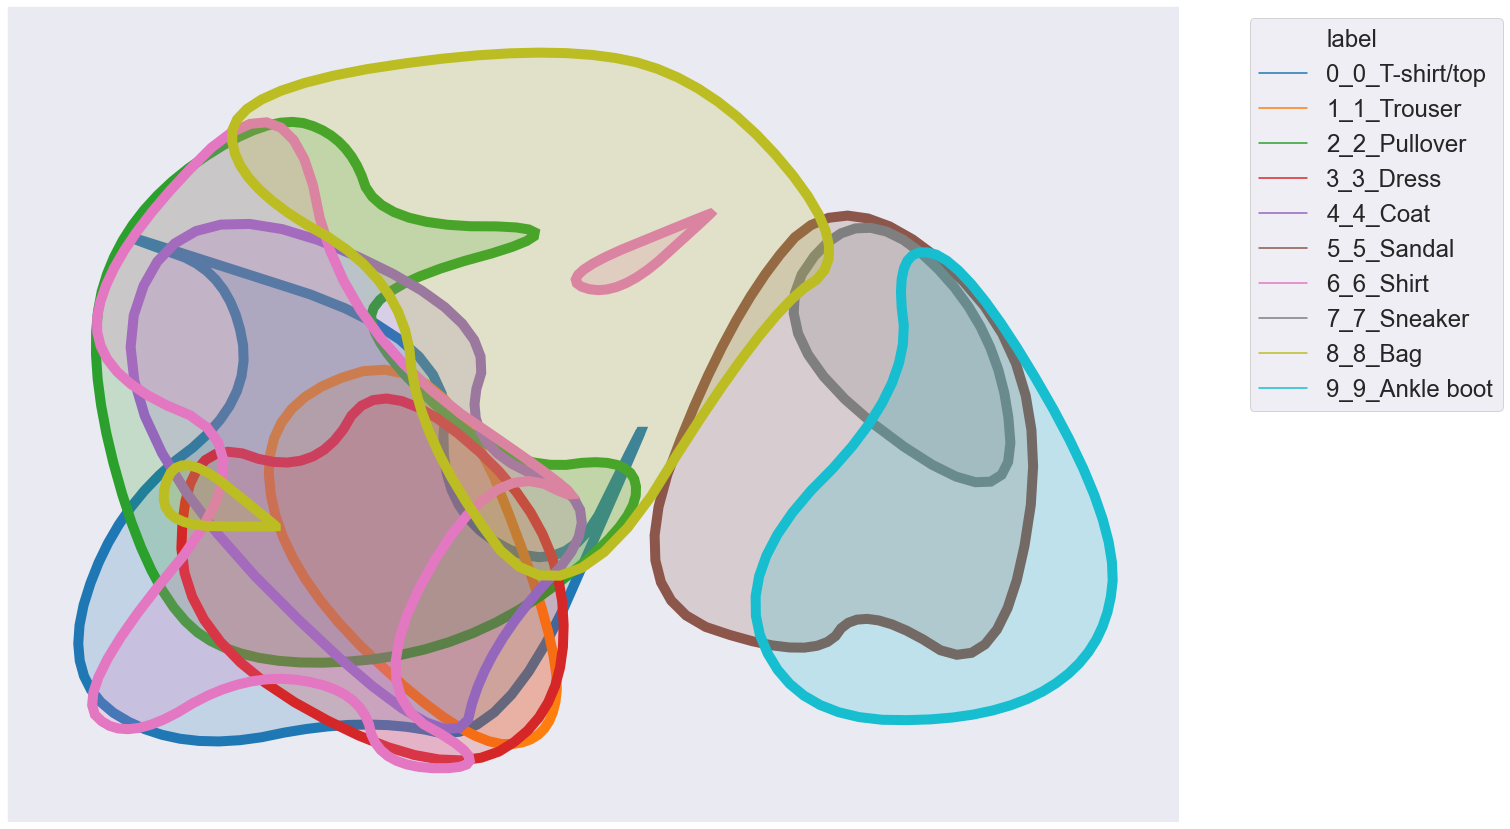

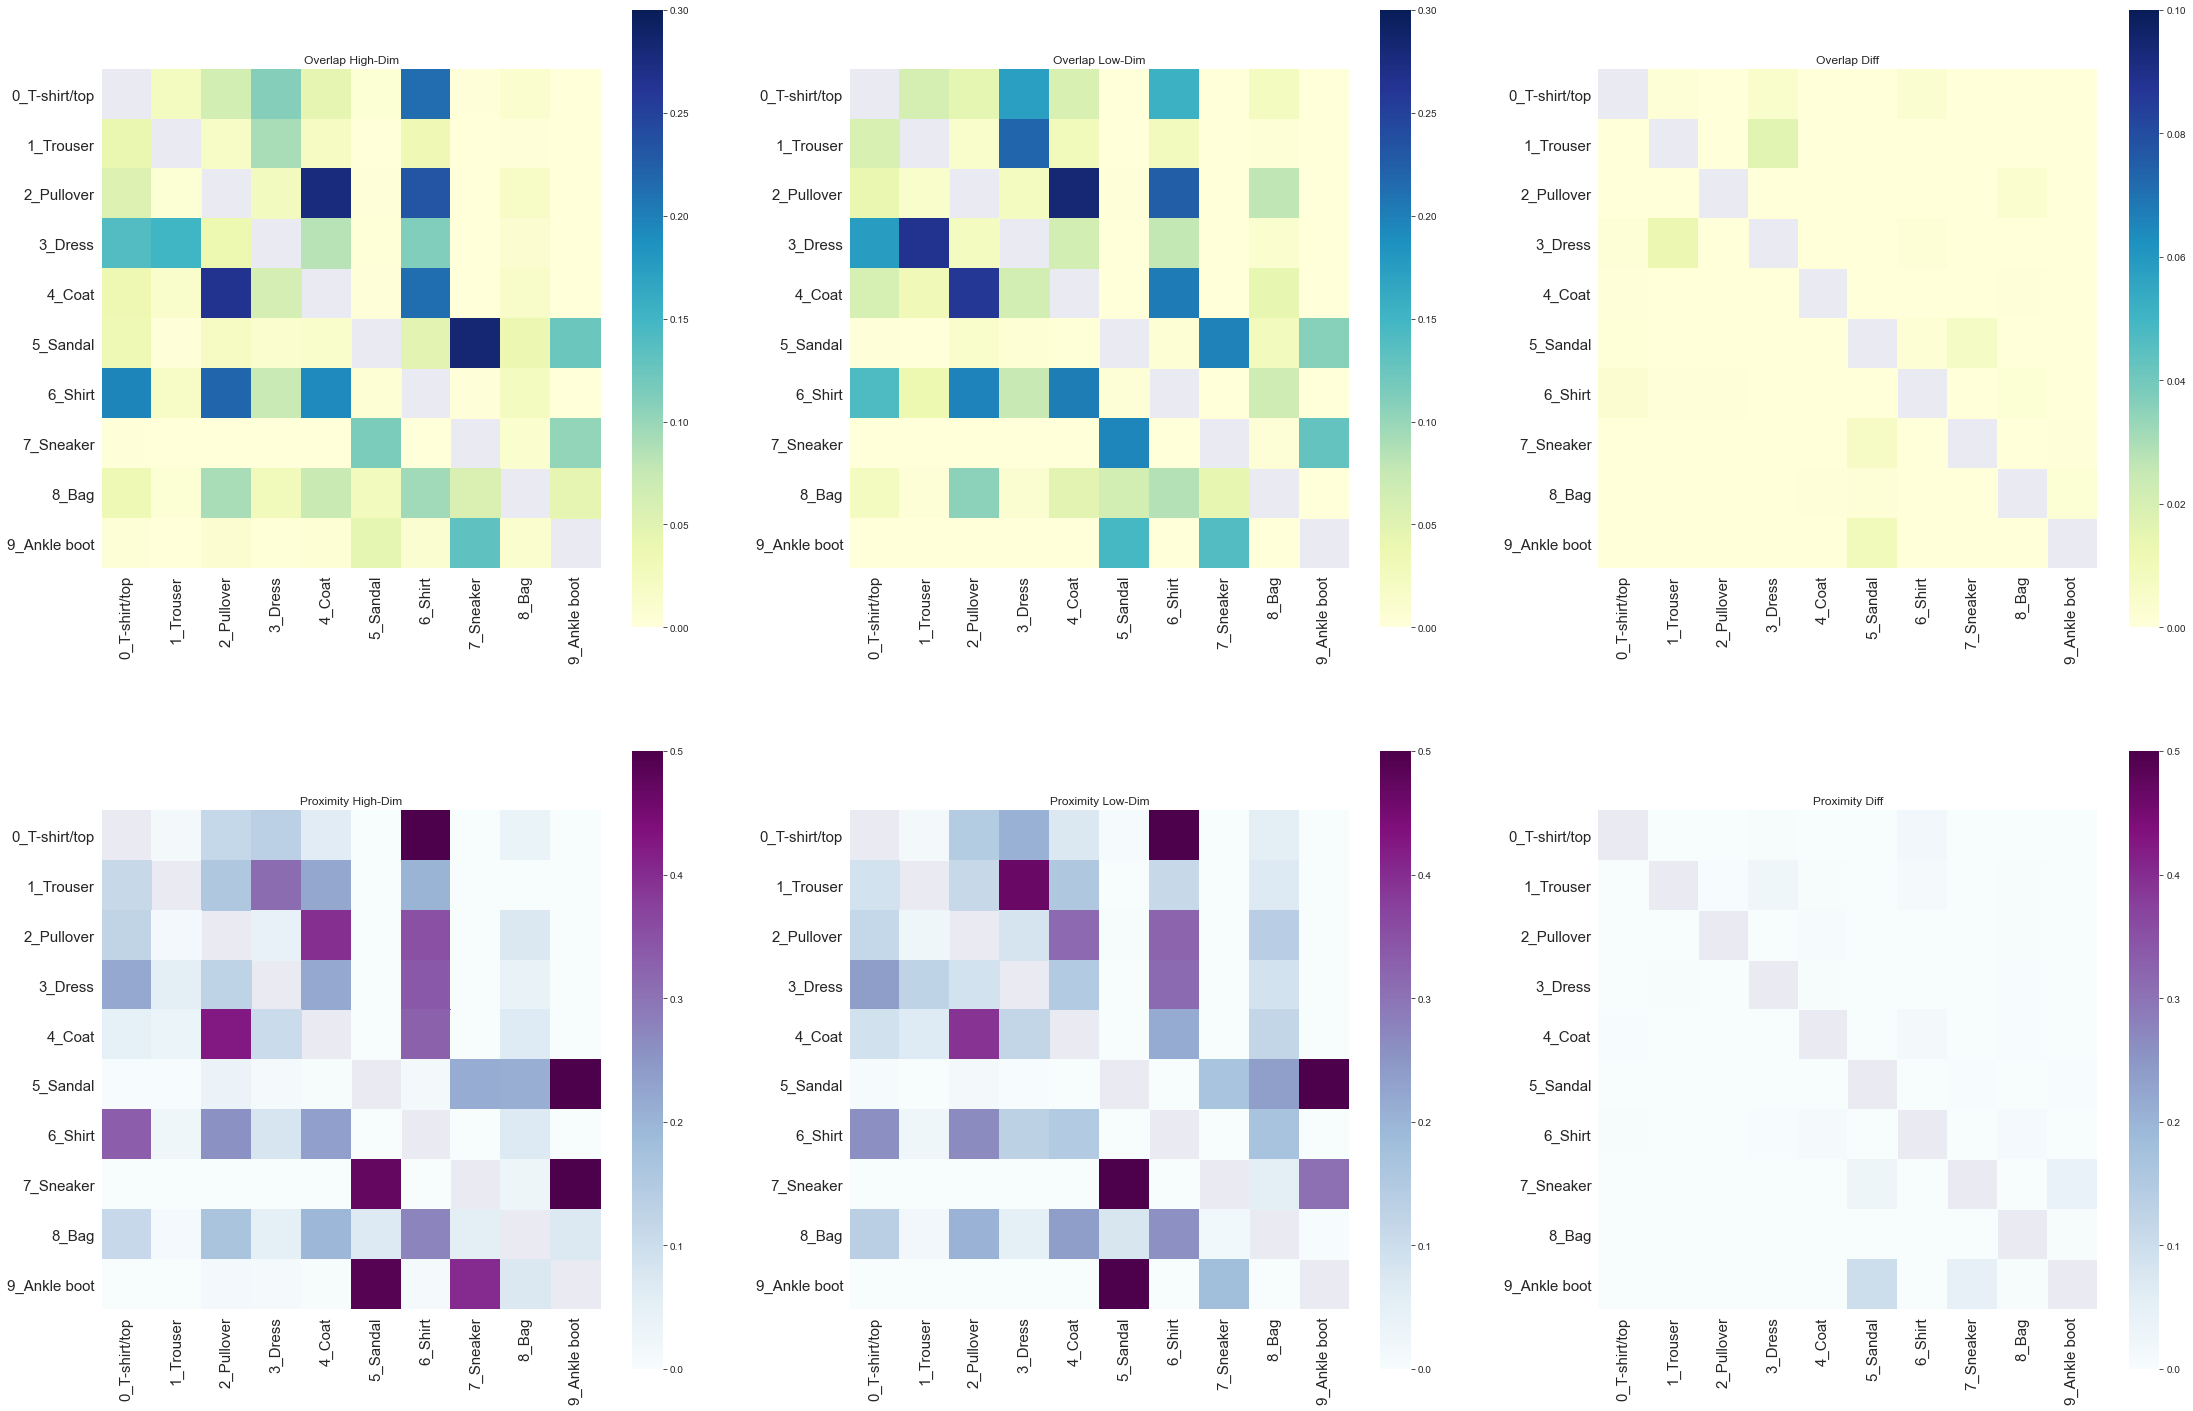

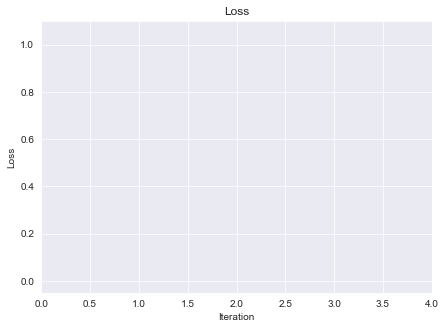

In [83]:
low_dim_orig = dim_orig_cp.fit_transform(X_orig, y_orig)

Skipping polygon of label 0 with area 0.00016719116717212046
Skipping polygon of label 2 with area 0.00016719116717212046
Skipping polygon of label 3 with area 0.0001671951533239735
Skipping polygon of label 4 with area 0.009802506702441732
Skipping polygon of label 6 with area 0.0001671871811153025


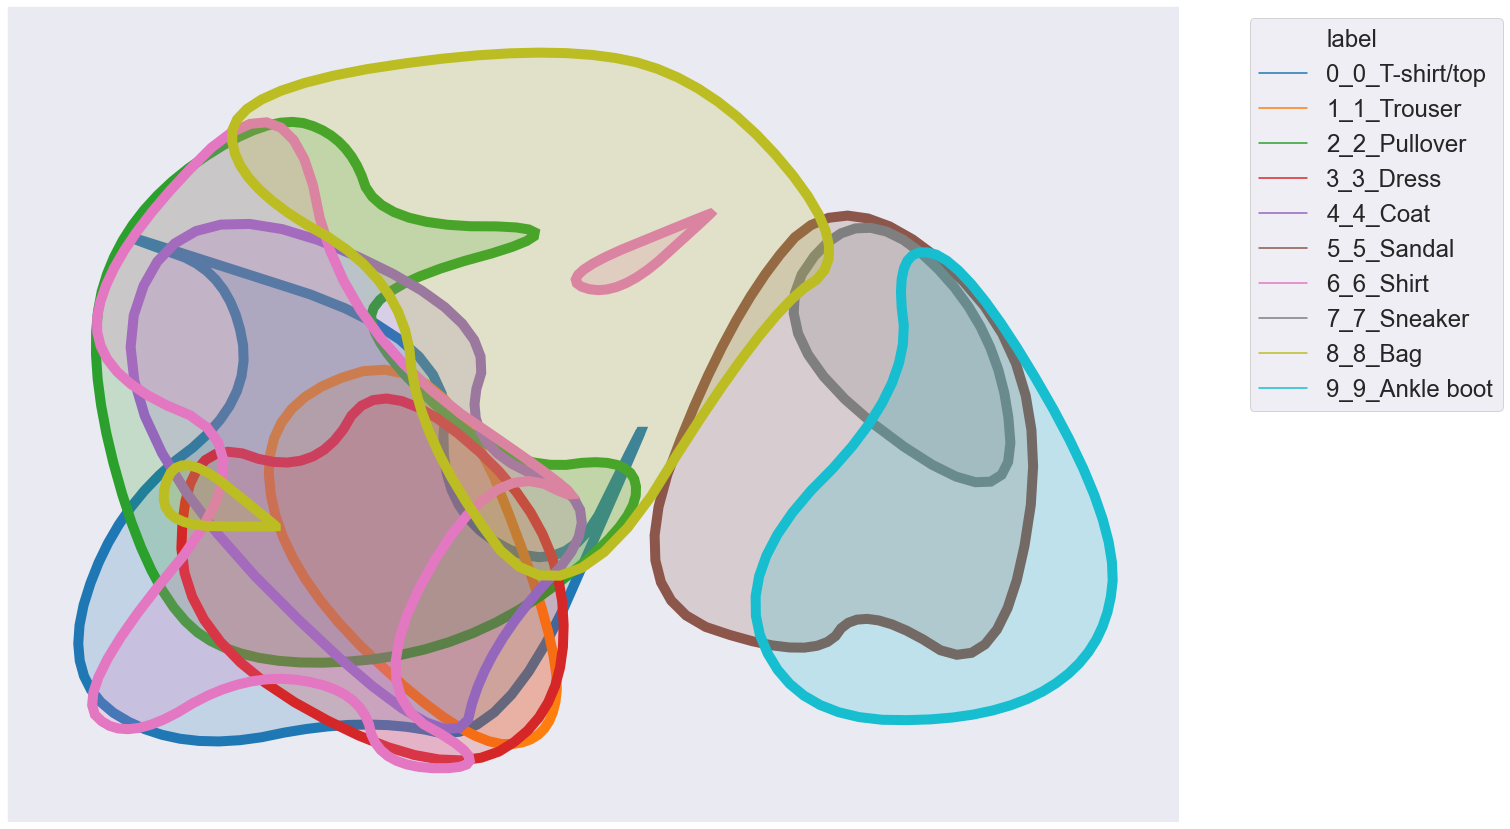

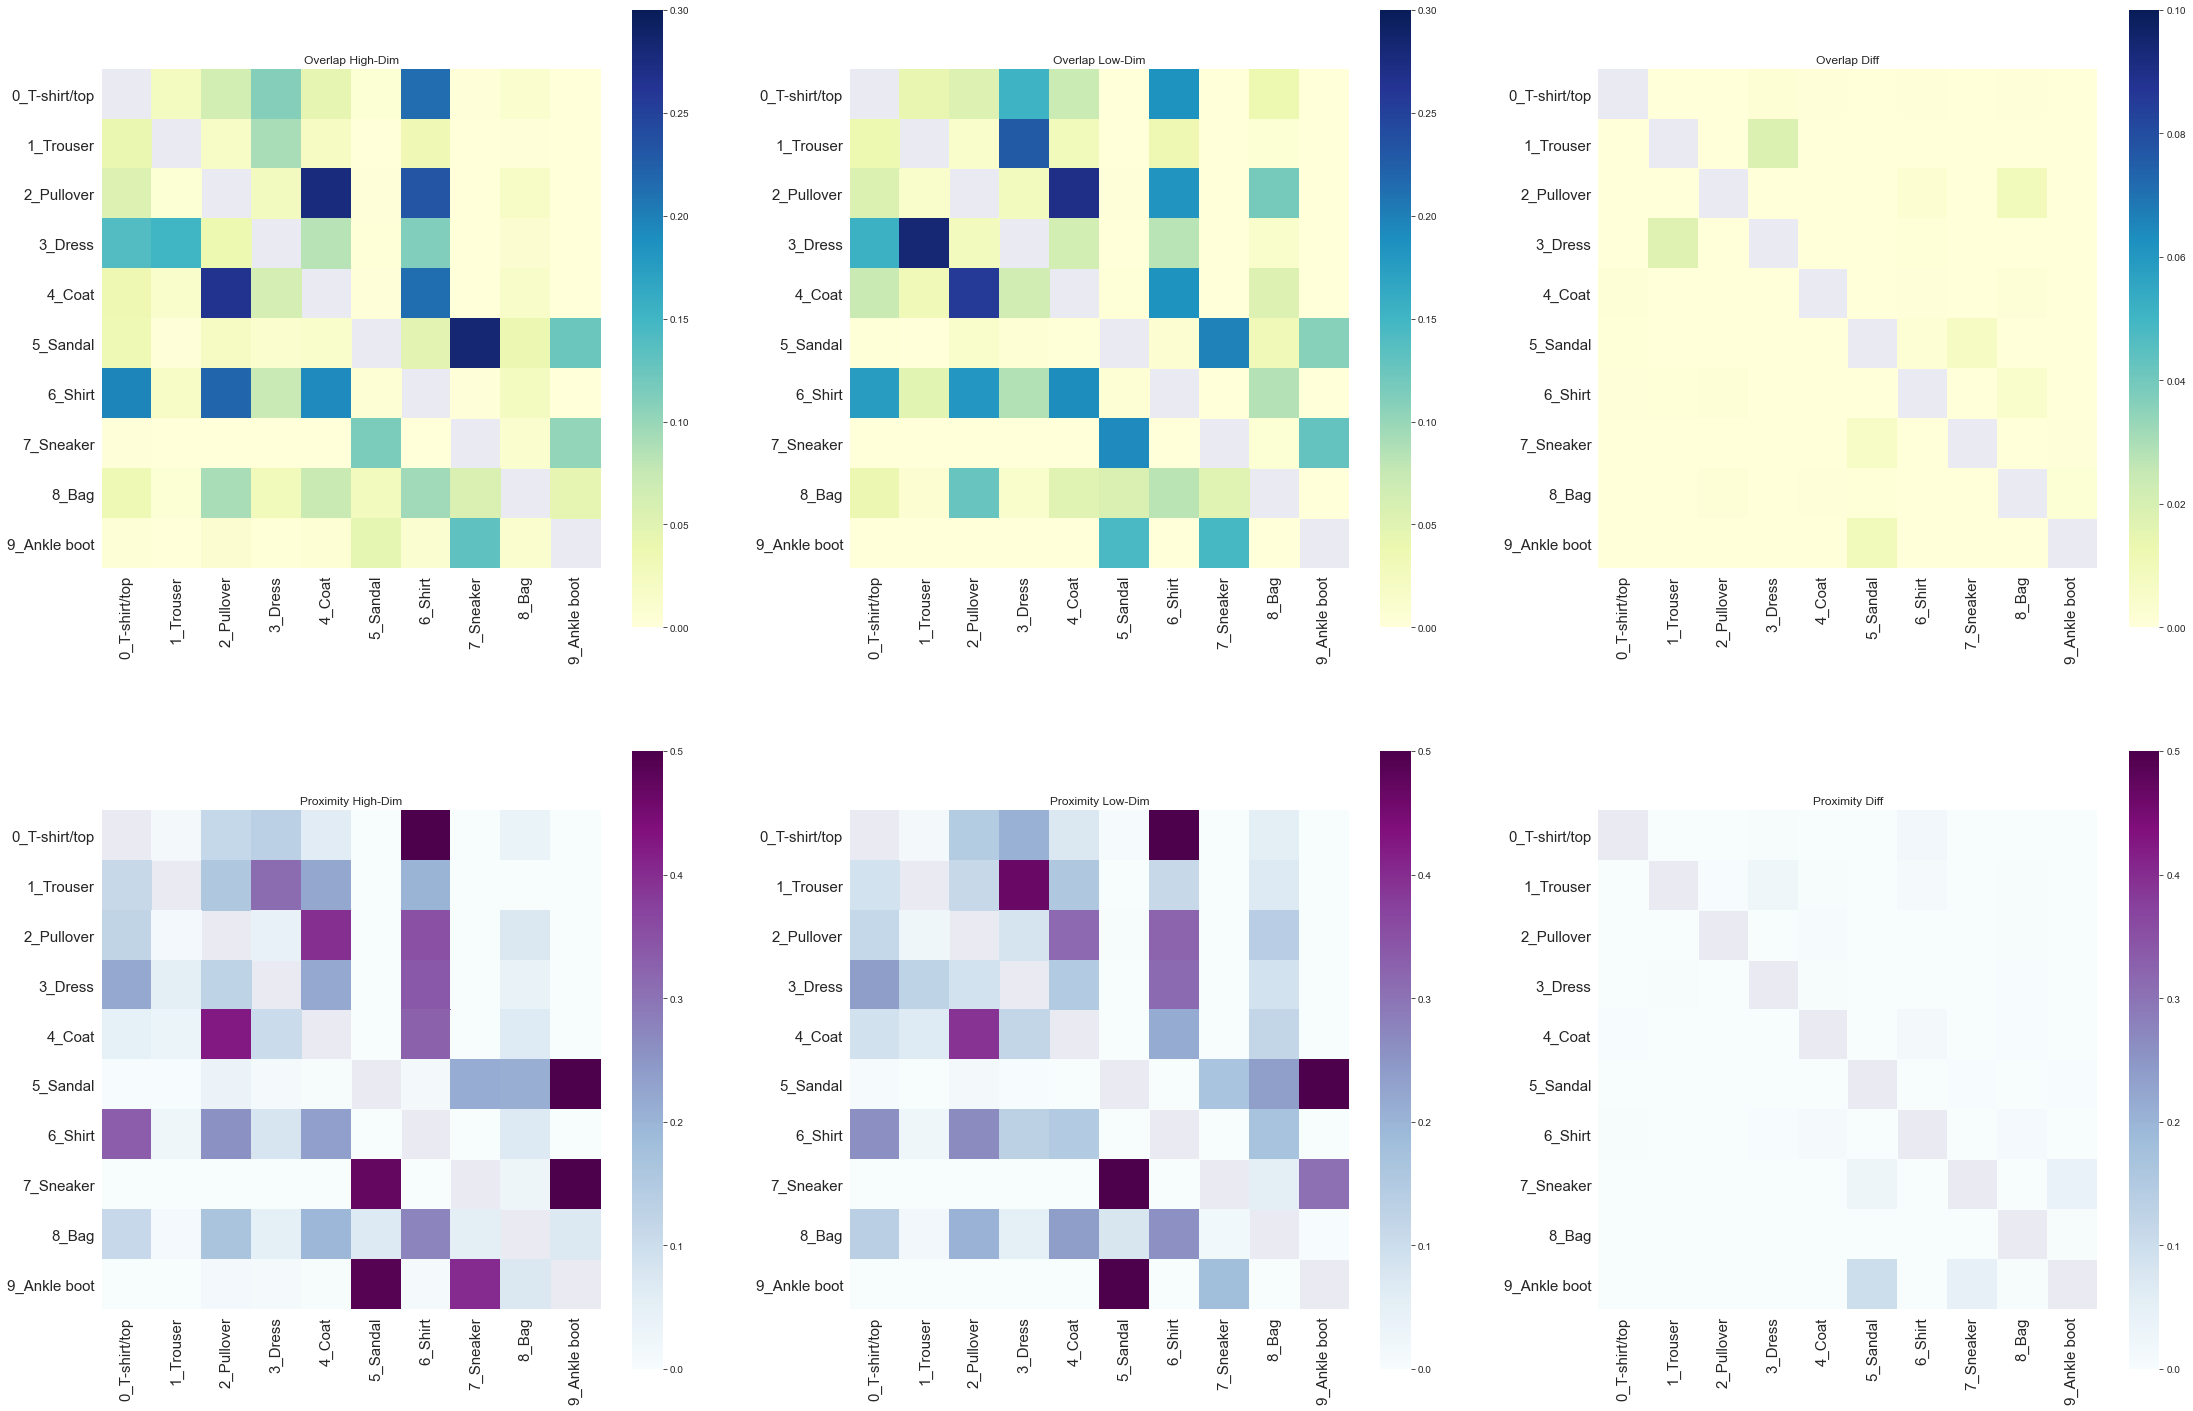

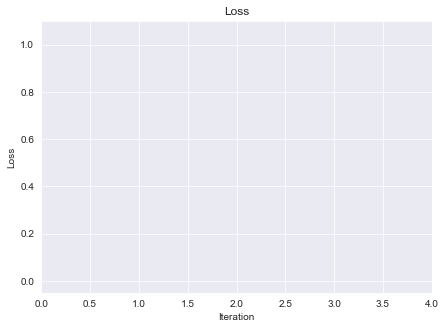

In [41]:
# dim_orig_cp.alpha = [0.7,0.3,0.6,0.7,0.7,0.8,1,0,0.9,0.5]
# dim_orig_cp.douglas_peucker_tolerance = 0.5
# dim_orig_cp.skip_polygons_with_area = 0.01
# dim_orig_cp.anchors_plot_sns_separate(0, True)

# High Dim Relations - Label Level

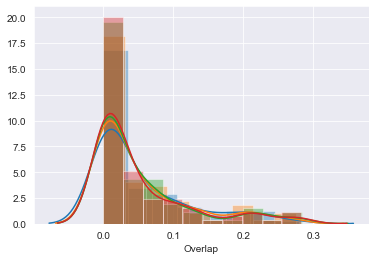

In [95]:
df_orig = pd.DataFrame(dim_orig_cp.inter_class_relations_label_level.flatten(), columns=['Overlap'])
df_orig['High-Dim'] = 'Orig (784)'
df_512 = pd.DataFrame(dim512_cp.inter_class_relations_label_level.flatten(), columns=['Overlap'])
df_512['High-Dim'] = '512'
df_128 = pd.DataFrame(dim128_cp.inter_class_relations_label_level.flatten(), columns=['Overlap'])
df_128['High-Dim'] = '128'
df_32 = pd.DataFrame(dim32_cp.inter_class_relations_label_level.flatten(), columns=['Overlap'])
df_32['High-Dim'] = '32'
df_label_relations = pd.concat([df_orig, df_512, df_128, df_32])
sns.distplot(df_32['Overlap'].dropna())
sns.distplot(df_128['Overlap'].dropna())
sns.distplot(df_512['Overlap'].dropna())
sns.distplot(df_orig['Overlap'].dropna())

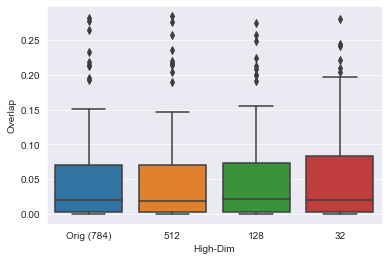

In [96]:
sns.boxplot(x='High-Dim', y='Overlap', data=df_label_relations, showfliers=True)

# Low Dim Relation - Label Level

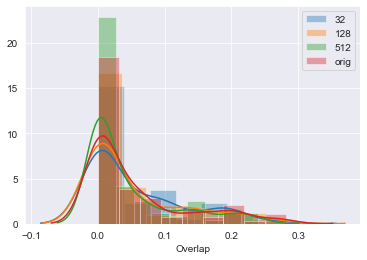

In [97]:
df_low_dim_orig = pd.DataFrame(dim_orig_cp.inter_class_relations_low_dim_label_level.flatten(), columns=['Overlap'])
df_low_dim_orig['High-Dim'] = 'Orig (784)'
df_low_dim_512 = pd.DataFrame(dim512_cp.inter_class_relations_low_dim_label_level.flatten(), columns=['Overlap'])
df_low_dim_512['High-Dim'] = '512'
df_low_dim_128 = pd.DataFrame(dim128_cp.inter_class_relations_low_dim_label_level.flatten(), columns=['Overlap'])
df_low_dim_128['High-Dim'] = '128'
df_low_dim_32 = pd.DataFrame(dim32_cp.inter_class_relations_low_dim_label_level.flatten(), columns=['Overlap'])
df_low_dim_32['High-Dim'] = '32'
df_low_dim_label_relations = pd.concat([df_low_dim_orig, df_low_dim_512, df_low_dim_128, df_low_dim_32])
sns.distplot(df_low_dim_32['Overlap'].dropna(), label='32')
sns.distplot(df_low_dim_128['Overlap'].dropna(), label='128')
sns.distplot(df_low_dim_512['Overlap'].dropna(), label='512')
sns.distplot(df_low_dim_orig['Overlap'].dropna(), label='orig')
plt.legend()

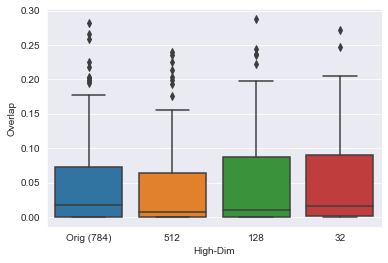

In [98]:
sns.boxplot(x='High-Dim', y='Overlap', data=df_low_dim_label_relations, showfliers=True)

# Compare High to Low Relations

In [99]:
df_label_relations['2D vs. High-Dim'] = 'High-Dim'
df_low_dim_label_relations['2D vs. High-Dim'] = '2D'
df_high_low = pd.concat([df_label_relations, df_low_dim_label_relations])

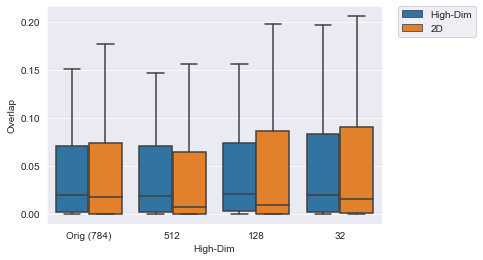

In [100]:
sns.boxplot(x='High-Dim', y='Overlap', hue='2D vs. High-Dim', data=df_high_low, showfliers=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# High Dim Relations - Anchor Level

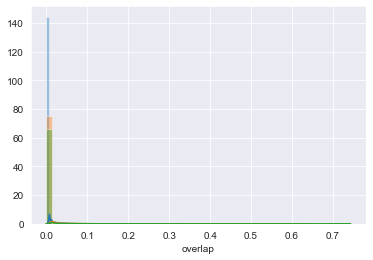

In [69]:
df_anchor_512 = pd.DataFrame(dim512_cp.inter_class_relations.flatten(), columns=['overlap'])
df_anchor_512['dim'] = 'dim_512'
df_anchor_128 = pd.DataFrame(dim128_cp.inter_class_relations.flatten(), columns=['overlap'])
df_anchor_128['dim'] = 'dim_128'
df_anchor_32 = pd.DataFrame(dim32_cp.inter_class_relations.flatten(), columns=['overlap'])
df_anchor_32['dim'] = 'dim_32'
df_anchor_relations = pd.concat([df_anchor_512, df_anchor_128, df_anchor_32])
sns.distplot(df_anchor_32['overlap'].dropna())
sns.distplot(df_anchor_128['overlap'].dropna())
sns.distplot(df_anchor_512['overlap'].dropna())

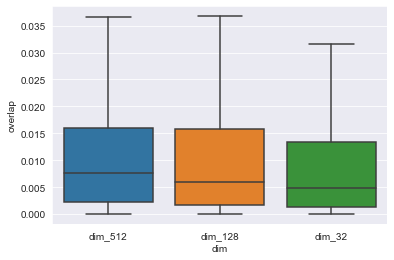

In [70]:
sns.boxplot(x='dim', y='overlap', data=df_anchor_relations[df_anchor_relations['overlap']> 0], showfliers=False)

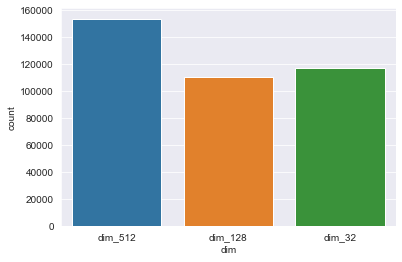

In [71]:
sns.countplot(x='dim', data=df_anchor_relations[df_anchor_relations['overlap']==0])